<a href="https://colab.research.google.com/github/jenjen0233/MIT-Projects/blob/main/Final_Capstone_Project_Reference_Notebook_Loan_Default_Prediction_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**
Loan Default Prediction is an important solution for financial institution as it helps prevent defaults, which can lead to significant financial losses, while also ensuring that creditworthy applicants are not unfairly rejected. Accurately identifying potential defaulters, the company can minimize losses and optimize profits.


### **The objective:**

 The goal is to build a predictive model to accurately predict whether an applicant is likely to default on a loan given their credit history or other characteristics.

### **The key questions:**

- What are key features of applicants that are most associated to loan default risk?
- What are the possible losses if the model predicts wrong?
- What are the risks associated with the chosen model, and how can they be quantified or mitigated?
- Is the chosen model interpretable, and can it provide clear decision-making rationale for applicants or stakeholders?

### **The problem formulation**:

- What is it that we are trying to solve using data science?  
Banking industry is important in every aspect of society. Making a loan to consolidate debt, make home improvement or any other reasons is important for applicant. Such a decision whether or not approve a loan request is important and it is crucial that the bank is able to approve the loan to the right applicant and make sure the loan could be repaid.

- We are exploring the relationship between independent variable and dependent variables, building  a predictive model that best predict the likelihood of being default on a loan given the applicant's credit history (the independent variables).

- Use the labeled data, we are training a predictive model, optimizing the loss, and choosing the best model with consideration of the most approriate business expenses and context. We will evaluate the performance of models on the test dataset and depend on the approriate cost we can tolerate, we choose the best model for our business context.

## **Data Description**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, accuracy_score,f1_score

# For tuning the model
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# import library tools for sklearn modeling
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier


## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MIT ML course/Data/hmeq.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [ ]:
# let's check percentage of nulls in the dataset
(df.isnull().mean()*100).round(2)

,0
BAD,0.00
LOAN,0.00
MORTDUE,8.69
VALUE,1.88
REASON,4.23
JOB,4.68
YOJ,8.64
DEROG,11.88
DELINQ,9.73
CLAGE,5.17


In [ ]:
# check duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# check the shape of dataset
df.shape

(5960, 13)

In [ ]:
# check data types of all variables
df.dtypes

,0
BAD,int64
LOAN,int64
MORTDUE,float64
VALUE,float64
REASON,object
JOB,object
YOJ,float64
DEROG,float64
DELINQ,float64
CLAGE,float64


Observation:
- Only REASON and JOB are object types. The rest is numeric.
- There are a lot of nulls in the dataset which DEBTINC has the most nulls with about 21% nulls and DEROG has about 12% nulls.
- All variables have some sort of nulls except for BAD and LOAN.
- There is no duplicates in the dataset.
- We have 5960 observations and 13 columns, which includes BAD, a target variable.

## Summary Statistics

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BAD,5960.0,NaN,NaN,NaN,0.199497,0.399656,0.0,0.0,0.0,0.0,1.0
LOAN,5960.0,NaN,NaN,NaN,18607.969799,11207.480417,1100.0,11100.0,16300.0,23300.0,89900.0
MORTDUE,5442.0,NaN,NaN,NaN,73760.8172,44457.609458,2063.0,46276.0,65019.0,91488.0,399550.0
VALUE,5848.0,NaN,NaN,NaN,101776.048741,57385.775334,8000.0,66075.5,89235.5,119824.25,855909.0
REASON,5708,2,DebtCon,3928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JOB,5681,6,Other,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YOJ,5445.0,NaN,NaN,NaN,8.922268,7.573982,0.0,3.0,7.0,13.0,41.0
DEROG,5252.0,NaN,NaN,NaN,0.25457,0.846047,0.0,0.0,0.0,0.0,10.0
DELINQ,5380.0,NaN,NaN,NaN,0.449442,1.127266,0.0,0.0,0.0,0.0,15.0
CLAGE,5652.0,NaN,NaN,NaN,179.766275,85.810092,0.0,115.116702,173.466667,231.562278,1168.233561


Observations:
- BAD has two values: 0 and 1
- LOAN is the amount of loan, ranging from 1100 to 89900, averaging around 18000.
- MORTDUE is the amount of existing mortgage due, ranging from 2063 to 399550, a huge spread.
- VALUE: is the current value of the property, ranging from 8000 to 855909. It is such a big spread of data.
- There 2 values of REASON, most common is DebtCon=debt consolidation. The other one is HomeImp= home improvement
- There 6 unique values of JOB and the most common is 'Other'
- YOJ is years at present job, ranging from 0 to 41. This is a big spread as well.
- DEROG: Number of major derogatory reports (which indicates a serious delinquency or late payments), ranging from 0 to 10. 75% of the data is 0 and this makes sense as most of our data is not default (BAD is 80%-20% for 0-1 labels). It has outliers towards the high end.
- DELINQ: Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). Again, this variable has outliers, which most of our data is 0 and the range is from 0 to 15.
- CLAGE: Age of the oldest credit line in months, ranging from 0 to 1168 months.Median is 173 months.
- NINQ: Number of recent credit inquiries, ranging from 0 to 17 with a median of 1.
- CLNO: Number of existing credit lines, ranging from 0 to 71. 71 could be an outlier. We will need to investigate about this. Median is 20.
- DEBTINC: Debt-to-income ratio, ranging from 0.52 to 203, which is a huge diffence. Maybe, we should look into it and see if there is an outlier there.

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **Univariate Analysis**


In [ ]:
# create num_cols and cat_cols
num_cols = df.select_dtypes(include=np.number).columns.to_list()
cat_cols = df.select_dtypes(include='object').columns.to_list()

In [ ]:
num_cols

['BAD',
 'LOAN',
 'MORTDUE',
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

In [ ]:
cat_cols

['REASON', 'JOB']

The amount of loan varies a lot from 1100 to 89900


In [ ]:
# range value of LOAN
df.LOAN.describe().T

,LOAN
count,5960.000000
mean,18607.969799
std,11207.480417
min,1100.000000
25%,11100.000000
50%,16300.000000
75%,23300.000000
max,89900.000000


In [ ]:
# what about YOJ
df.YOJ.describe().T

,YOJ
count,5445.000000
mean,8.922268
std,7.573982
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,41.000000


In [ ]:
# create a function to plot the numeric variables with a histogram and a boxplot for each
def hist_boxplot(df, col):
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The x-axis will be shared among all the subplots
        figsize=(8, 6)
    )

    # Creating the subplots
    # Boxplot
    sns.boxplot(x=df[col], ax=ax_box, showmeans=True, boxprops={ 'alpha': 0.4} )

    # Histogram
    sns.histplot(x=df[col], kde=True, ax=ax_hist)

    # Calculate mean and median
    mean_val = np.mean(df[col])
    median_val = np.median(df[col])

    # Add vertical lines for mean and median
    ax_hist.axvline(mean_val, color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(median_val, color='black', linestyle='-')     # Add median to the histogram

    plt.show()

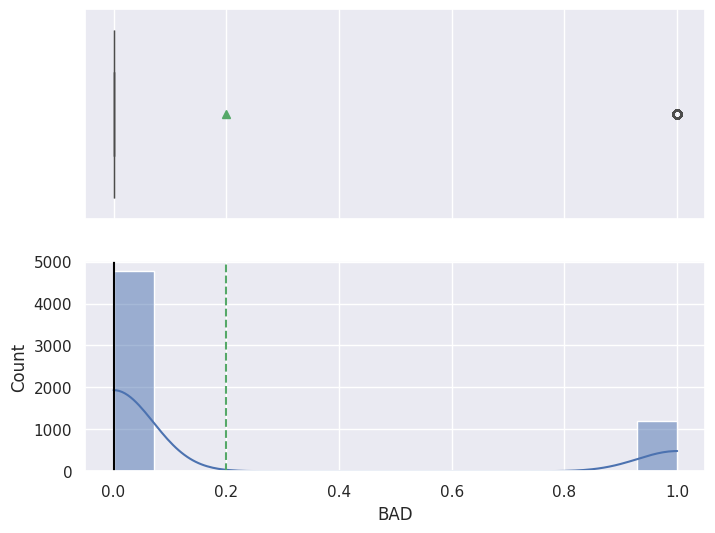

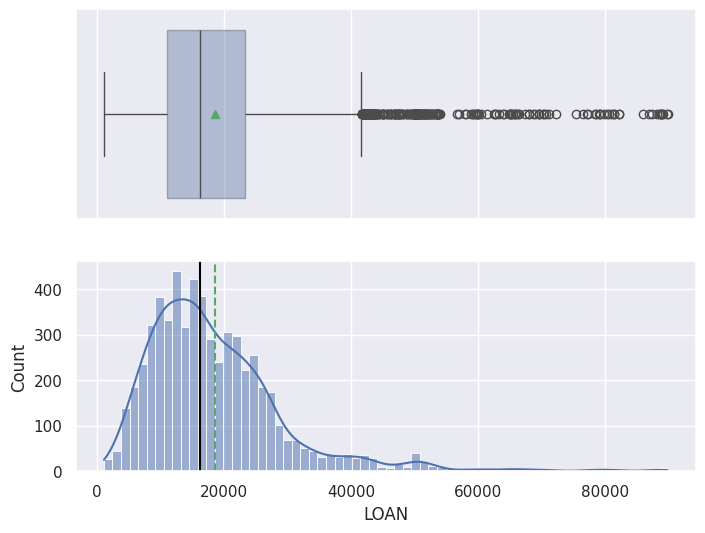

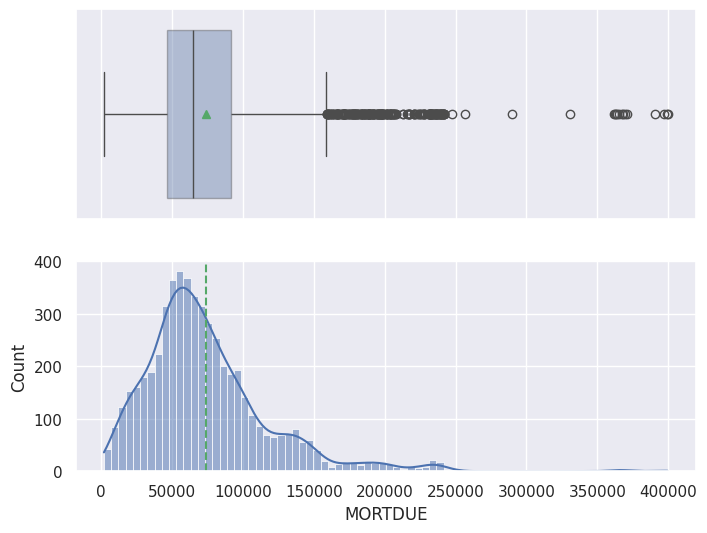

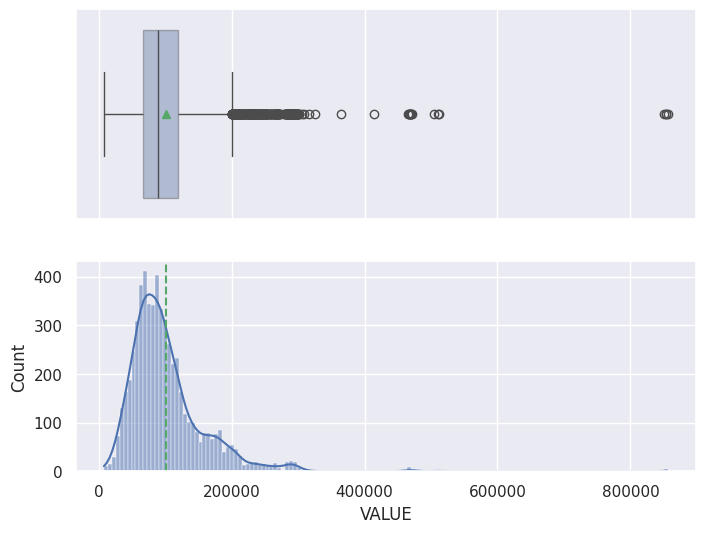

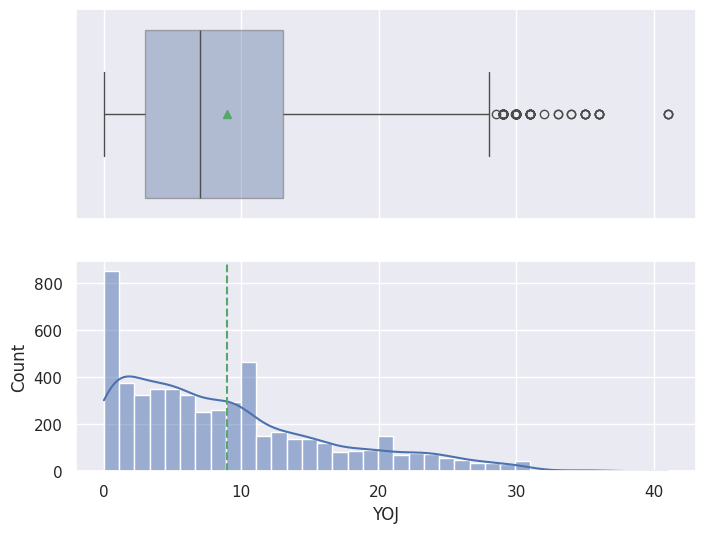

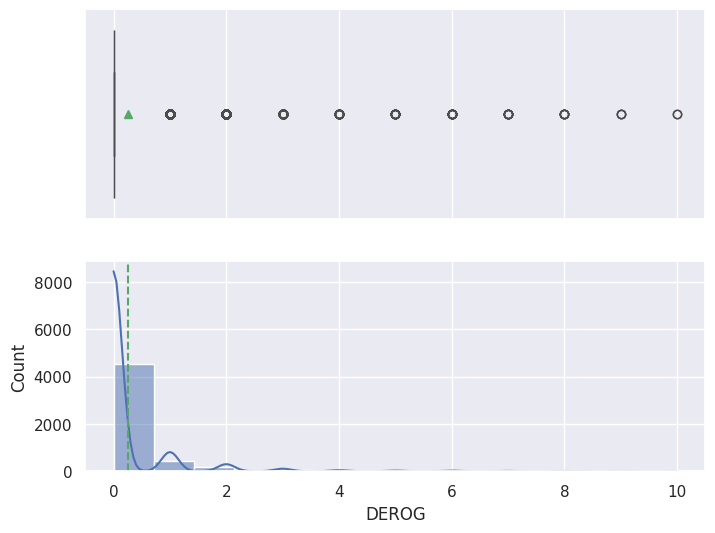

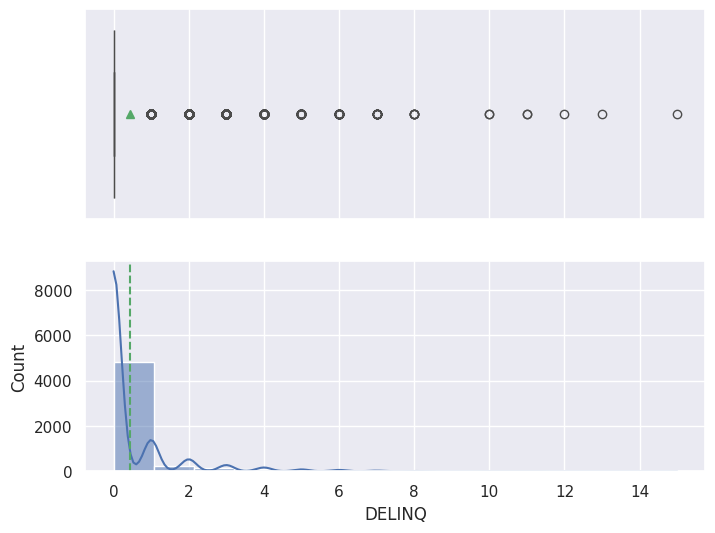

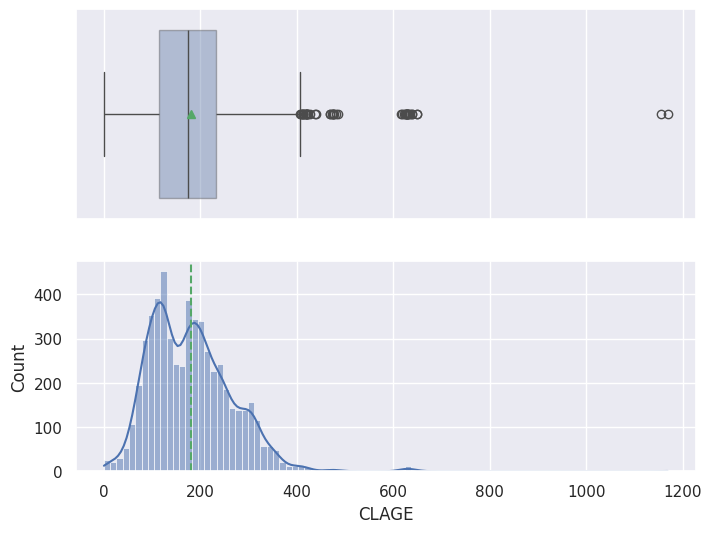

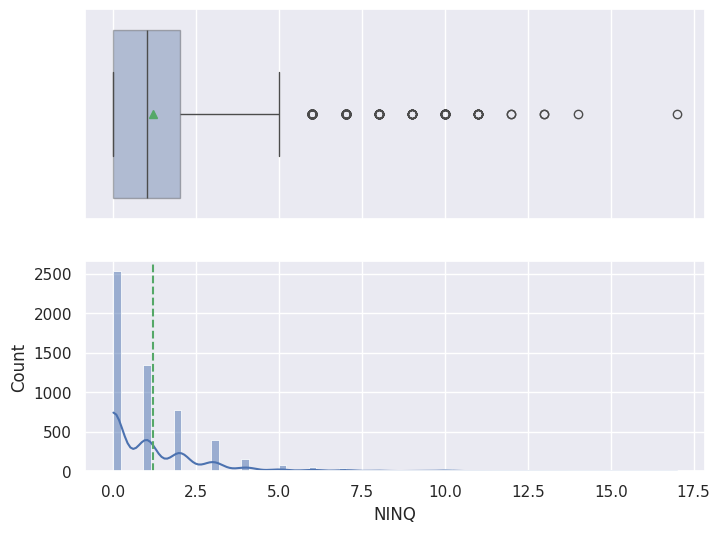

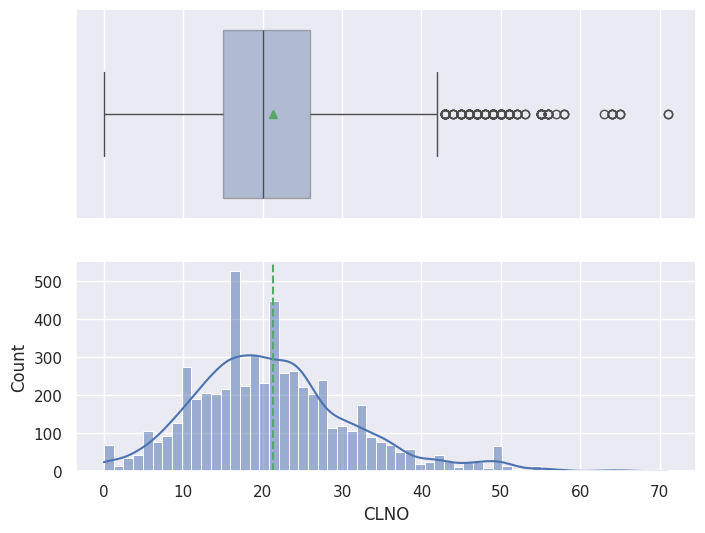

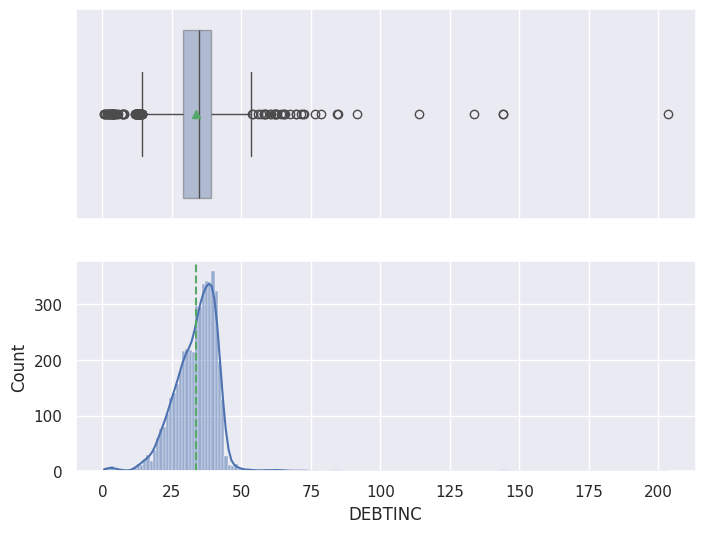

In [ ]:
for col in num_cols:
    hist_boxplot(df, col)

Observation:
- Skewness: all of our numerical variables are right-skewed with many outliers on the right.
- BAD is the target variable, which is imbalance.

In [ ]:
# plot cat variables distribution
def plot_categorical_variables(df, cols, ncols=3, figsize=(15, 5)):
    """
    Plot multiple categorical variables in subplots with 3 columns and dynamic rows.

    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe containing the data
    cols : list
        List of categorical column names to plot
    ncols : int, optional (default=3)
        Number of columns in the subplot grid
    figsize : tuple, optional (default=(15, 5))
        Base figure size that will be adjusted based on number of rows
    """
    # Calculate number of rows needed
    nrows = (len(cols) + ncols - 1) // ncols

    # Adjust figure size based on number of rows
    fig_height = figsize[1] * nrows
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                            figsize=(figsize[0], fig_height))

    # Flatten axes array for easier iteration
    axes = axes.flatten() if nrows > 1 else [axes] if ncols == 1 else axes

    # Create subplots
    for idx, (col, ax) in enumerate(zip(cols, axes)):
        # Calculate value counts and order
        value_counts = df[col].value_counts(normalize=True)
        order = value_counts.index

        # Create countplot
        sns.countplot(data=df, x=col, order=order, ax=ax)

        # Annotate with percentages
        total = len(df)
        for p in ax.patches:
            percentage = f'{(p.get_height() / total) * 100:.1f}%'
            ax.annotate(percentage,
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='baseline', fontsize=9,
                       color='black', xytext=(0, 5),
                       textcoords='offset points')

        # Customize subplot
        ax.set_title(f'{col}')
        ax.set_ylabel('')
        ax.set_xlabel('')

        # Rotate x-labels if they're too long
        if max([len(str(label.get_text())) for label in ax.get_xticklabels()]) > 10:
            ax.tick_params(axis='x', rotation=45)

    # Remove empty subplots if any
    for idx in range(len(cols), len(axes)):
        fig.delaxes(axes[idx])

    # Adjust layout
    plt.tight_layout()
    plt.show()

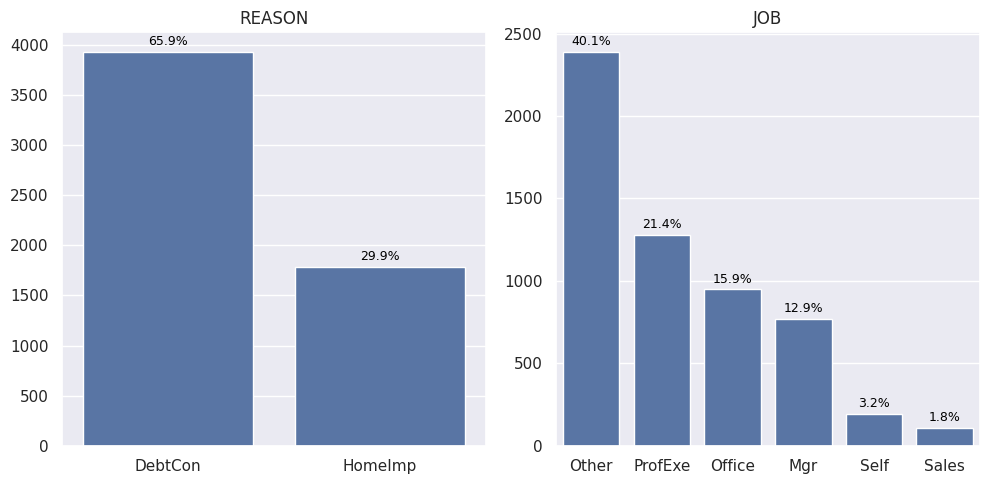

In [ ]:
plot_categorical_variables(df, cat_cols)

Observation:
- Most the loan request is debt consolidation, 70% versus 30% of home improvment.
- The applicant's job mostly in 'other' category, followed by professional executives, offices, and managers. Minority is self-employed (3%) and sales (2%)

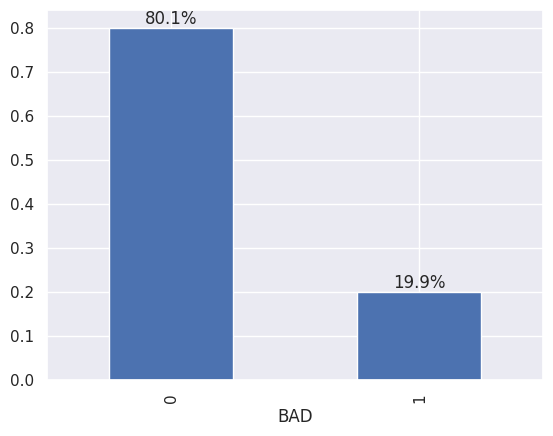

In [ ]:
# let's look at if the target is balance
ax = df['BAD'].value_counts(1).plot(kind='bar')

# Add percentage labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12)
plt.show()

Observation:
- The target is imbalanced: only 20% of the applicants defaulted.

### **Bivariate Analysis**

What is the default rate among the job?

In [ ]:
(pd.crosstab(df['JOB'], df['BAD'], normalize='index')*100).sort_values(by=1, ascending=False)

BAD,0,1
JOB,,
Sales,65.137615,34.862385
Self,69.948187,30.051813
Mgr,76.662321,23.337679
Other,76.800670,23.199330
ProfExe,83.385580,16.614420
Office,86.814346,13.185654


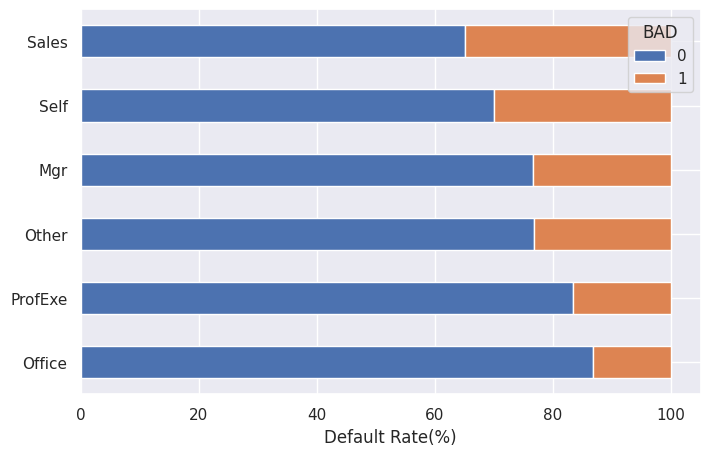

In [ ]:
# Calculate conversion rate per occupation
job_percentage = (pd.crosstab(df['JOB'], df['BAD'], normalize='index')*100).sort_values(by=1)

# Plot
job_percentage.plot(kind='barh', stacked=True, figsize=(8,5))
plt.xlabel('Default Rate(%)')
plt.ylabel('')
plt.show()

Observation:
- Sales and Self's default rates are highest

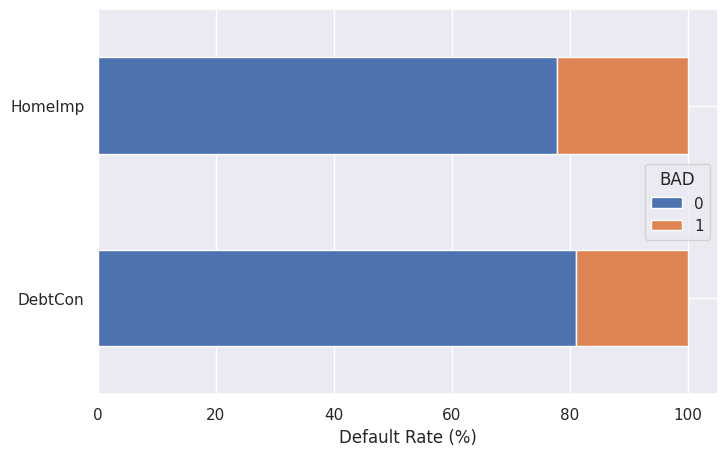

In [ ]:
# Calculate conversion rate per occupation
df_percentage = (pd.crosstab(df['REASON'], df['BAD'], normalize='index')*100).sort_values(by=1)

# Plot
df_percentage.plot(kind='barh', stacked=True, figsize=(8,5))
plt.xlabel('Default Rate (%)')
plt.ylabel('')
plt.show()

Observation:
- Defaut rate is not much different between HomeImp and DebtCon.

#### Correlation Heatmap

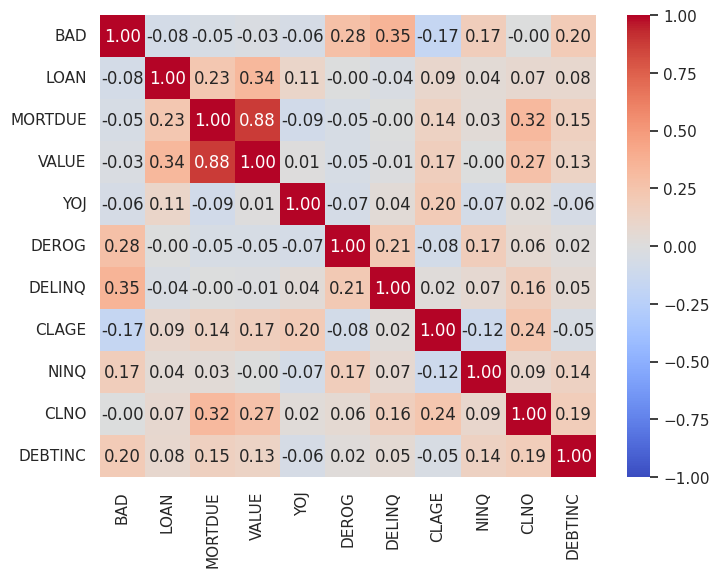

In [ ]:
# plot heatmap to see correlation of numerical columns with the label 'status'
df_corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.show()

#### Distribution of BAD and other variables

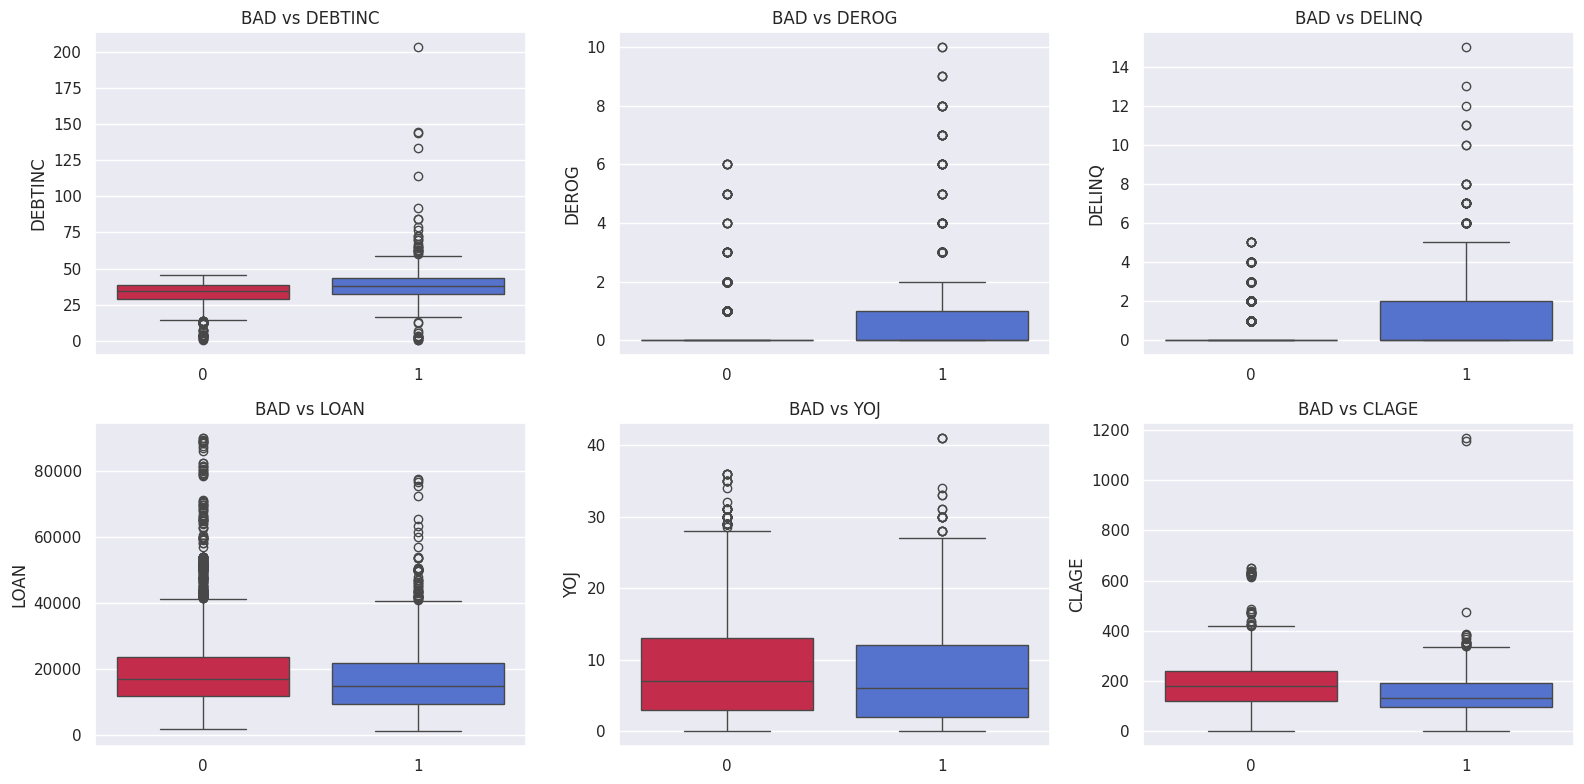

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical variables to compare with BAD
num_vars = ["DEBTINC", "DEROG", "DELINQ", "LOAN", "YOJ", "CLAGE"]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

# Flatten axes array to loop through easily
axes = axes.flatten()

# Loop through each variable and create a boxplot
for i, var in enumerate(num_vars):
    sns.boxplot(data=df, x="BAD", y=var, ax=axes[i], palette=['crimson', 'royalblue'])
    axes[i].set_title(f"BAD vs {var}")
    axes[i].set_xlabel("")  # X-axis label
    axes[i].set_ylabel(var)  # Y-axis label

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


Let's examine the extent of missing values in DEBTINC for both defaulters and non-defaulters.

In [ ]:
# how much nulls of DEBTINC among defaults and non-defaults
print((df[df['BAD'] == 1]['DEBTINC'].isnull().sum())/(len(df[df['BAD'] == 1])))
print()
print((df[df['BAD'] == 0]['DEBTINC'].isnull().sum())/(len(df[df['BAD'] == 0])))

0.6610597140454163

0.1008174386920981


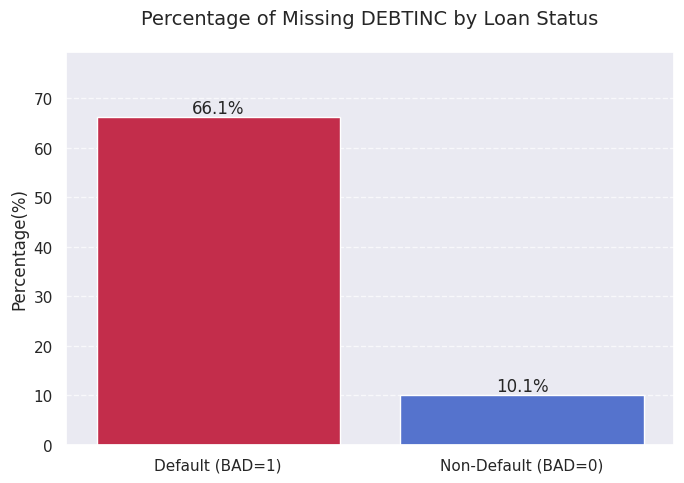

In [ ]:
# Calculate the percentages
default_null_percent = (df[df['BAD'] == 1]['DEBTINC'].isnull().sum())/(len(df[df['BAD'] == 1])) * 100
nondefault_null_percent = (df[df['BAD'] == 0]['DEBTINC'].isnull().sum())/(len(df[df['BAD'] == 0])) * 100

# Create a DataFrame for visualization
null_debtinc = pd.DataFrame({
    'Loan_Status': ['Default (BAD=1)', 'Non-Default (BAD=0)'],
    'Missing_DEBTINC': [default_null_percent, nondefault_null_percent]
})

# Create the plot
plt.figure(figsize=(7, 5))
ax = sns.barplot(x='Loan_Status', y='Missing_DEBTINC', data=null_debtinc, palette=['crimson', 'royalblue'])

# Add text labels on the bars
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

# Add titles and styling
plt.title('Percentage of Missing DEBTINC by Loan Status', fontsize=14, pad=20)
plt.ylabel('Percentage(%)', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(fontsize=11)
plt.ylim(0, max(default_null_percent, nondefault_null_percent) * 1.2)  # Add some space for labels
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### **Multivariate Analysis**

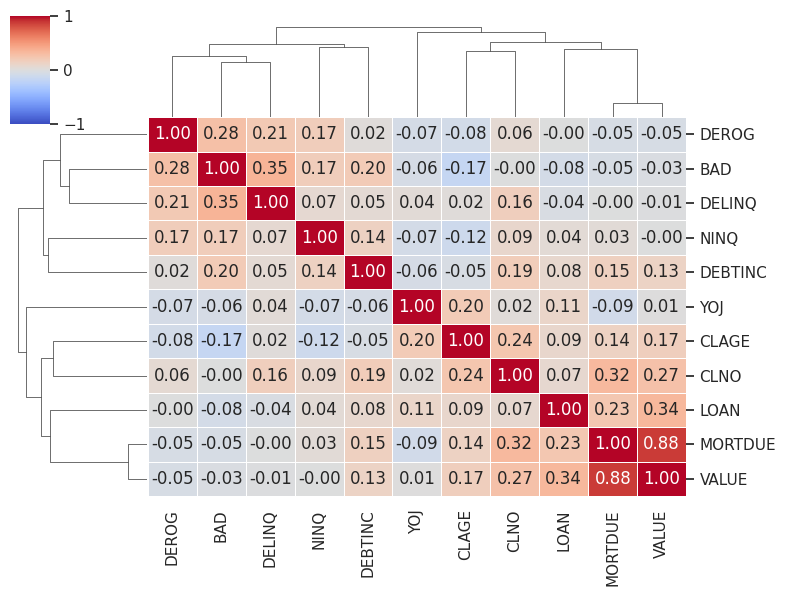

In [ ]:
# Drop non-numeric columns (if any)
df_numeric = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Create the cluster heatmap
sns.clustermap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, vmin=-1, vmax=1, figsize=(8, 6))

# Show the plot
plt.show()

Observation:
The correlation cluster matrix is helpful to show the most correlated in groups so that we can see the features in 2 big clusters:
- First group:
  - LOAN, MORTDUE, and VALUE are closely correlated in a cluster. This is reasonable as the higher the current value of property, the higher the existing mortgage amount due, and so the higher amount of loan approved.
  - CLNO and CLAGE are in a cluster and closely correlated as the more number of credit lines, the higher the age of the oldest credit line.
  - YOJ is more closely correlated to CLAGE as the longer the years at present job, the longer the age of the oldest credit line. There is a negative relationship between YOJ and MORTDUE, meaning the longer year at present job, the lower the amount due on the existing mortgage.
- Second group:
  - BAD, DELINQ and DEROG are closely correlated as the higher the number of delinquent credit lines, the higher likelihood of being default, and so the higher the number of derogatory report. **DELINQ and DEROG** are key important features that are directly correlated to our target **BAD**.
  - NINQ and DEBTINC are correlated in a cluster as the higher the number of recent credit inquiries, the higher the debt to income ratio. And these features are also correlated to BAD.


Let's explore three variables at a time

In [ ]:
def plot_job_vs_numerical(df, num_cols):
    # Calculate the number of rows needed for subplots
    n = len(num_cols)
    n_rows = (n + 1) // 2  # Ensure we have enough rows for 2 columns

    # Create a figure with subplots
    fig, axes = plt.subplots(n_rows, 2, figsize=(12, 4 * n_rows))
    fig.tight_layout(pad=4.0)

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Plot each numerical column against JOB
    for i, col in enumerate(num_cols):
        sns.boxplot(data=df, x="JOB", y=col, hue="BAD", ax=axes[i])
        axes[i].set_title(f"JOB vs {col}")

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.show()

In [ ]:
num_cols.remove('BAD')

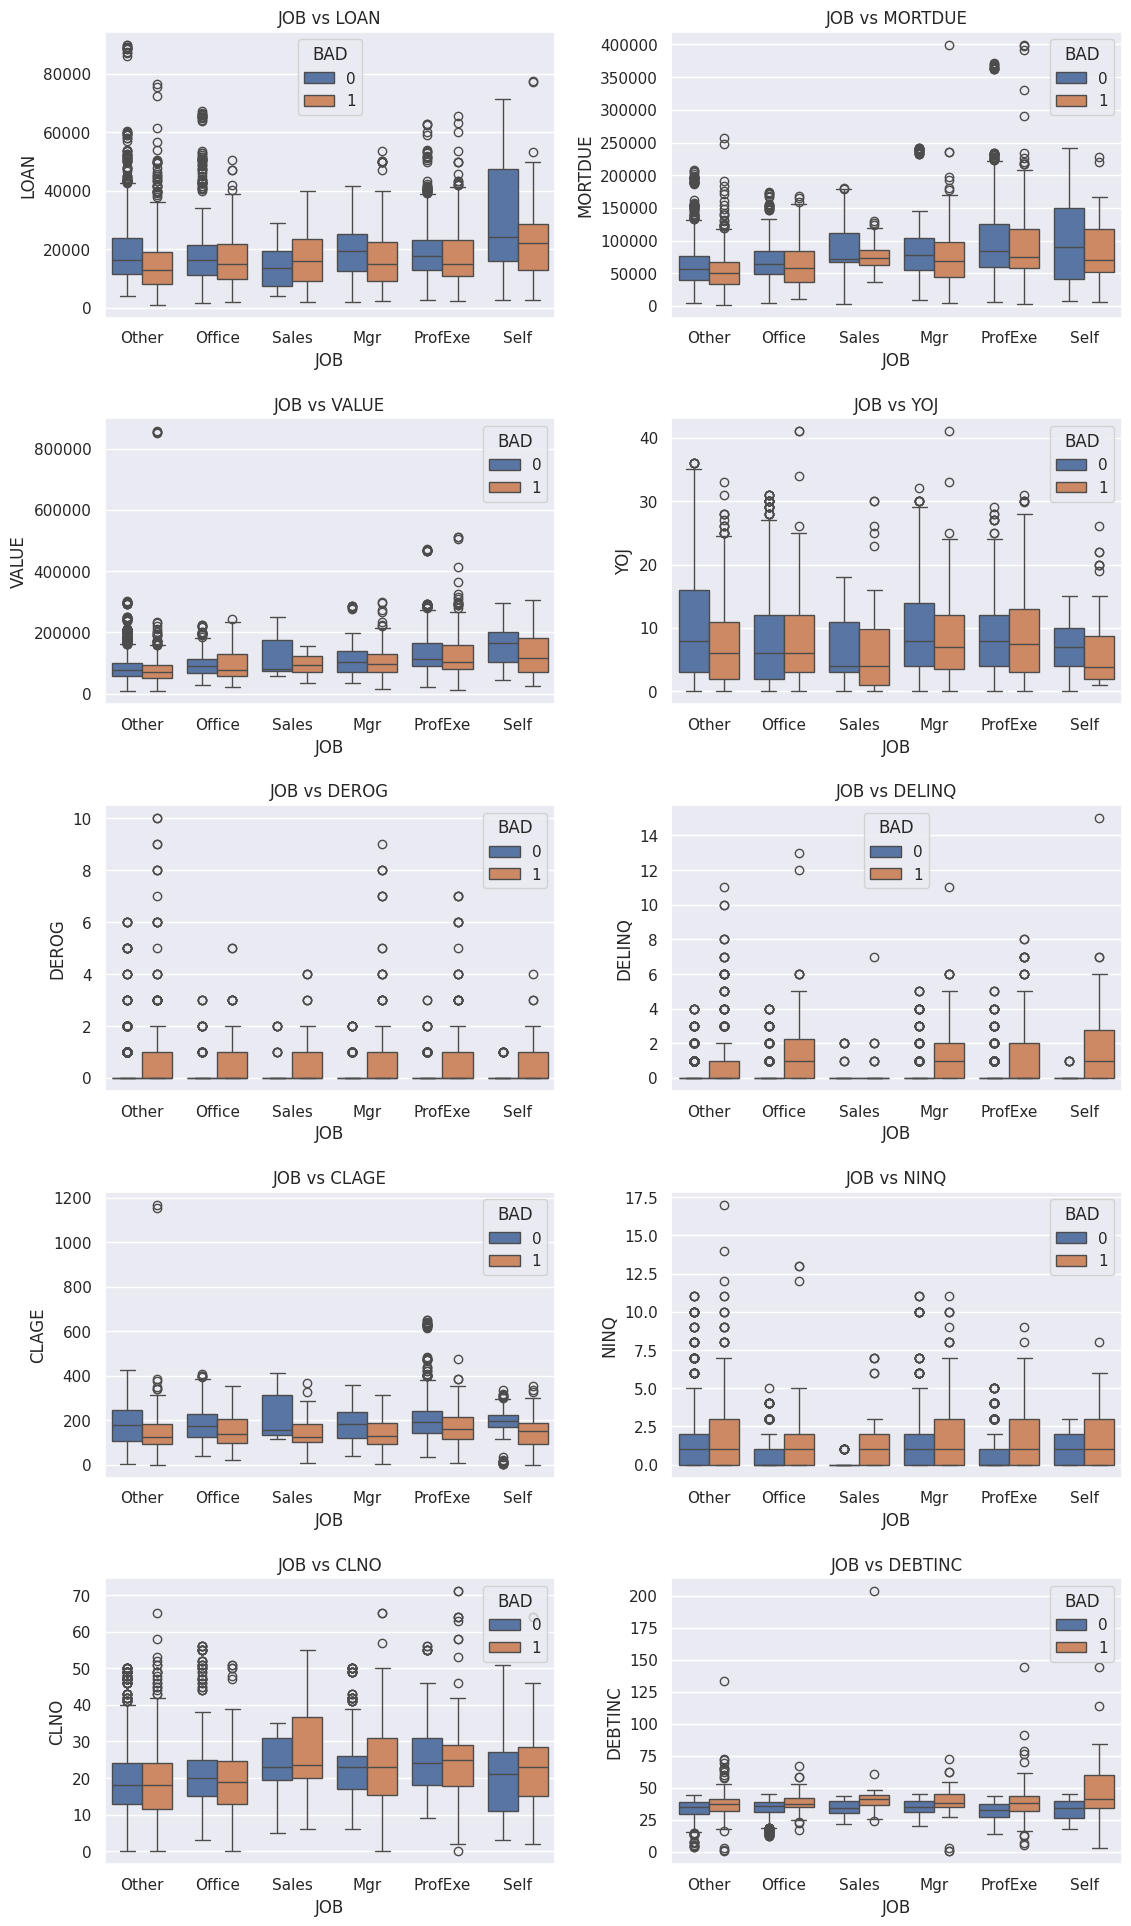

In [ ]:
plot_job_vs_numerical(df, num_cols)

- DEBTINC: median value is higher for Self than any other job.
- YOJ: median value is lower for Self than other job
- DEROG and DELINQ: we see much more data for the variables in cases of defaults compared to non-defaults

In [ ]:
def plot_scatter(df, x, y, hue='BAD', alpha=0.6, s=10):
    """
    Plots a scatterplot for two numerical variables with 'BAD' as hue.

    Parameters:
    - df: DataFrame
    - x_var: str, variable for x-axis
    - y_var: str, variable for y-axis
    - hue_var: str, variable for color grouping (default is 'BAD')
    - alpha: float, transparency level for better visualization (default 0.6)
    - s: int, size of points (default 10)

    Returns:
    - A scatter plot with the specified variables
    """
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x=x, y=y, hue=hue, alpha=alpha, s=s, edgecolor=None)

    # Add labels and title
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{x} vs. {y} by Credit Status")
    plt.legend(title=hue)
    plt.show()

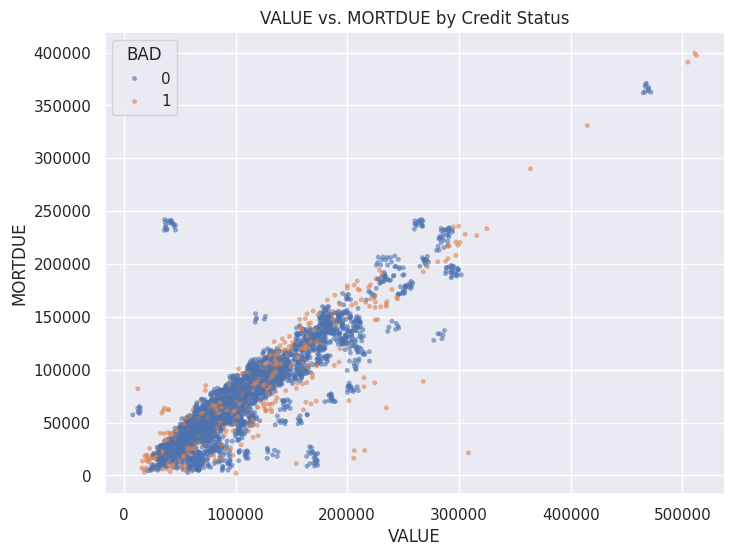

In [ ]:
plot_scatter(df, 'VALUE', 'MORTDUE')

Observation:
- This plot show a straight line relationship between VALUE and MORTDUE. We will need to combine the two features to avoid the multicolinearity issue.

Let's check how JOB and REASON distributed by BAD

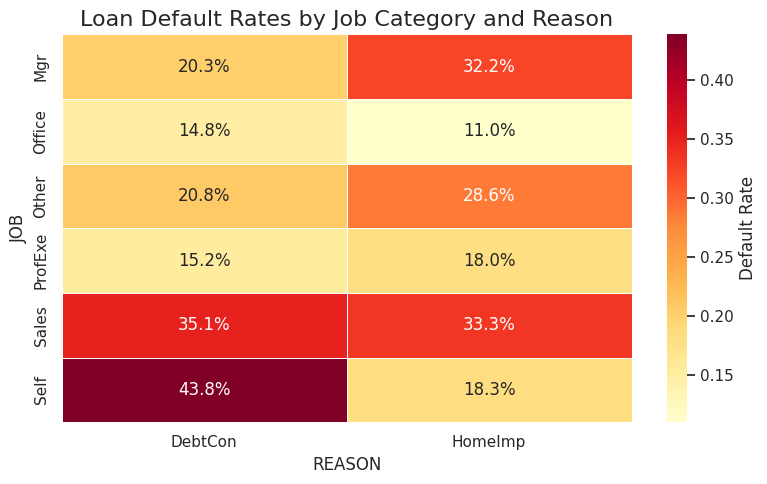

In [ ]:
# First, create the crosstab without margins for visualization
crosstab_viz = pd.crosstab(
    [df['JOB'], df['REASON']],
    df['BAD'],
    normalize='index'
)

# Extract just the bad loan column (assuming BAD=1 means default)
default_rates = crosstab_viz[1].unstack()

# Create the heatmap
plt.figure(figsize=(8, 5))
ax = sns.heatmap(default_rates,
                annot=True,           # Show values in cells
                cmap='YlOrRd',        # Yellow-Orange-Red color scheme (good for risk)
                fmt='.1%',            # Format as percentage
                linewidths=0.5,       # Add grid lines
                cbar_kws={'label': 'Default Rate'})

plt.title('Loan Default Rates by Job Category and Reason', fontsize=16)
plt.tight_layout()
plt.show()

- Self-employed borrowers taking loans for debt consolidation (DebtCon) have the highest default rate at 43.8% - nearly half of these loans end in default.
- Sales professionals also show high default rates, with 35.1% for debt consolidation and 33.3% for home improvement loans.
- Managers (Mgr) have a significantly higher default rate for home improvement loans (32.2%) compared to debt consolidation (20.3%).
- Office workers have the lowest overall default rates, particularly for home improvement loans (11.0%).
- The "Other" job category shows a pattern similar to managers, with higher default rates for home improvement loans.
- Professional/Executive (ProfExe) workers have moderate default rates compared to other categories.
- There is incosistent relationship/pattern among job and reason for the loan request

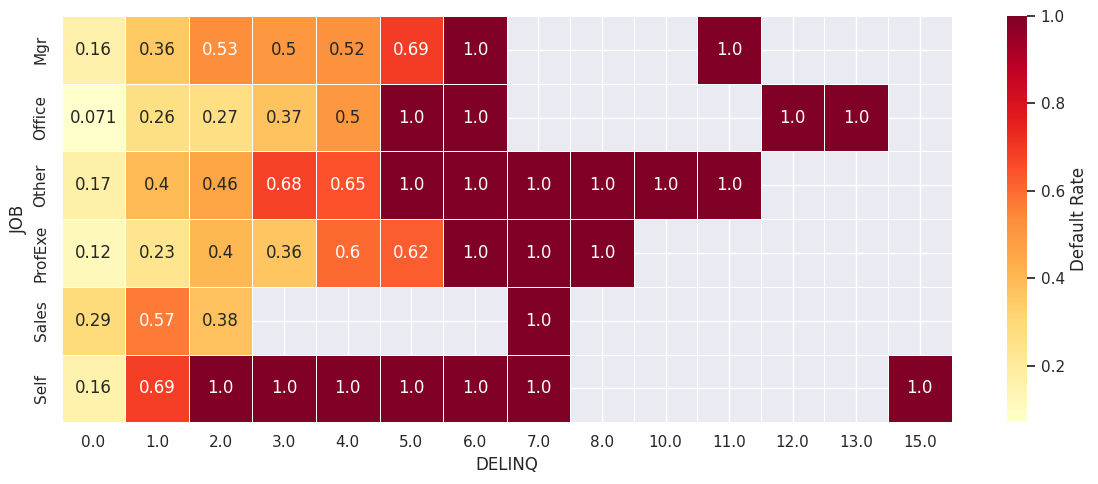

In [ ]:
# First, create the crosstab without margins for visualization
crosstab_viz = pd.crosstab(
    [df['JOB'], df['DELINQ']],
    df['BAD'],
    normalize='index'
)

# Extract just the bad loan column (assuming BAD=1 means default)
default_rates = crosstab_viz[1].unstack()

# Create the heatmap
plt.figure(figsize=(12, 5))
ax = sns.heatmap(default_rates,
                annot=True,           # Show values in cells
                cmap='YlOrRd',        # Yellow-Orange-Red color scheme (good for risk)
                fmt='.2',            # Format as percentage
                linewidths=0.5,       # Add grid lines
                cbar_kws={'label': 'Default Rate'})
plt.tight_layout()
plt.show()

Observation:
- From this graph, we see Self and Sales have higher percentage of default starting at DELINQ (the number of delinquent credit lines) of 2 and above, compared to other jobs.

## Treating Outliers

In [ ]:
num_cols

['LOAN',
 'MORTDUE',
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

In [ ]:
# num_cols.remove('BAD')

BEFORE LOG TRANSFORMATION

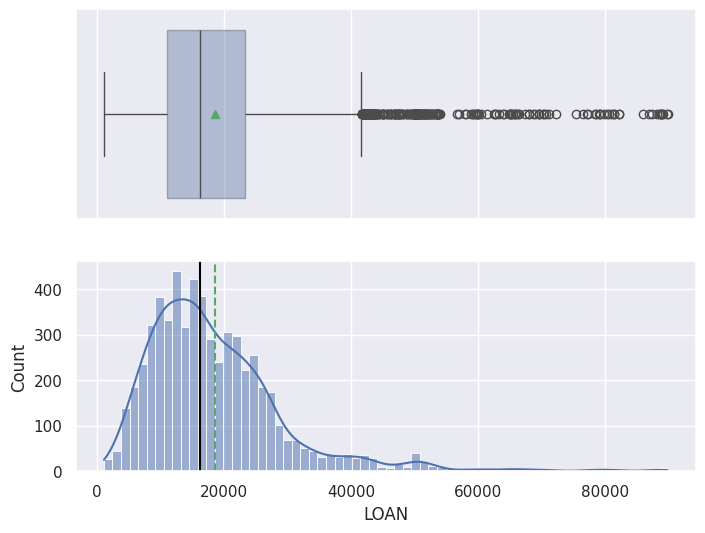

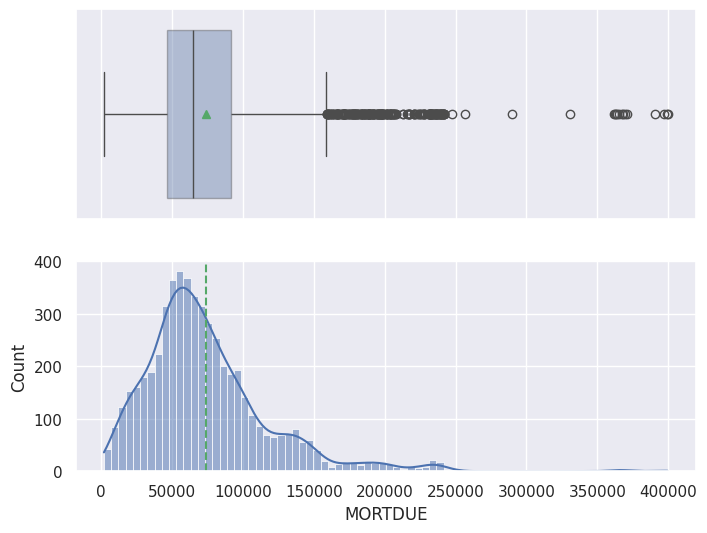

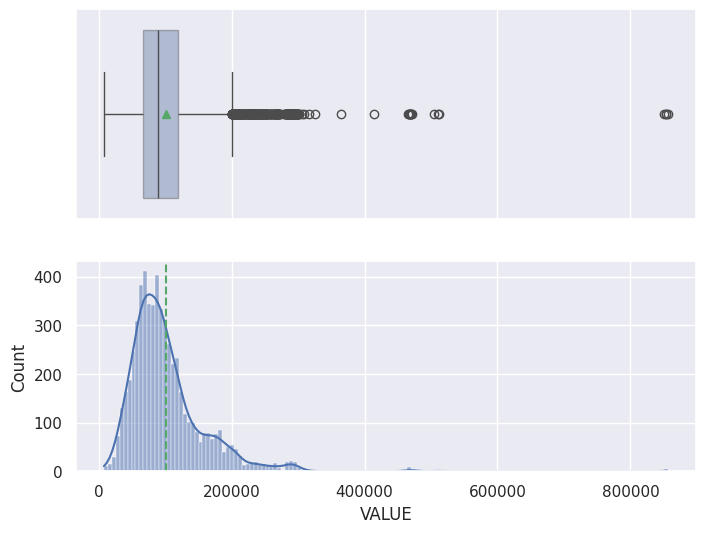

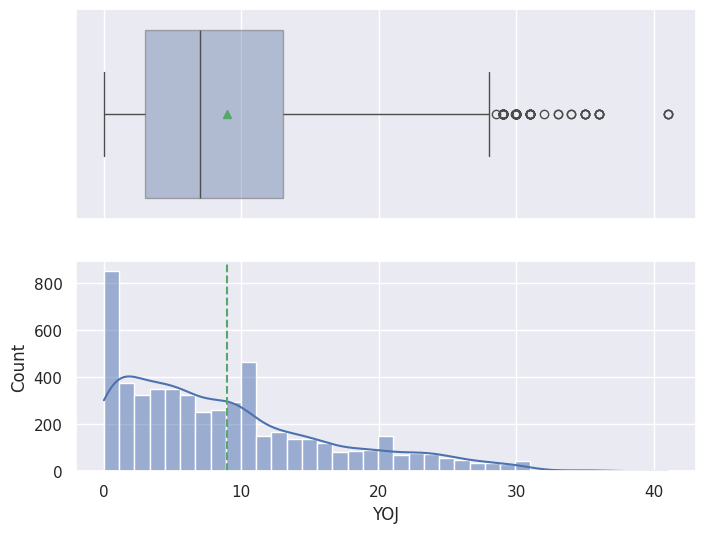

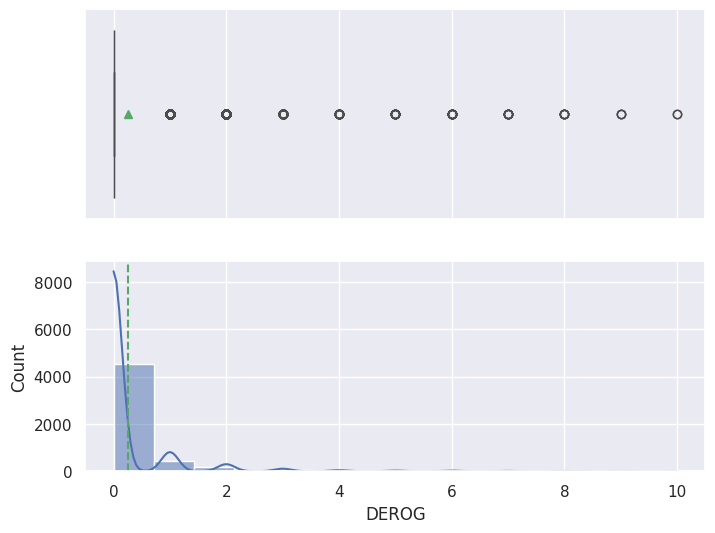

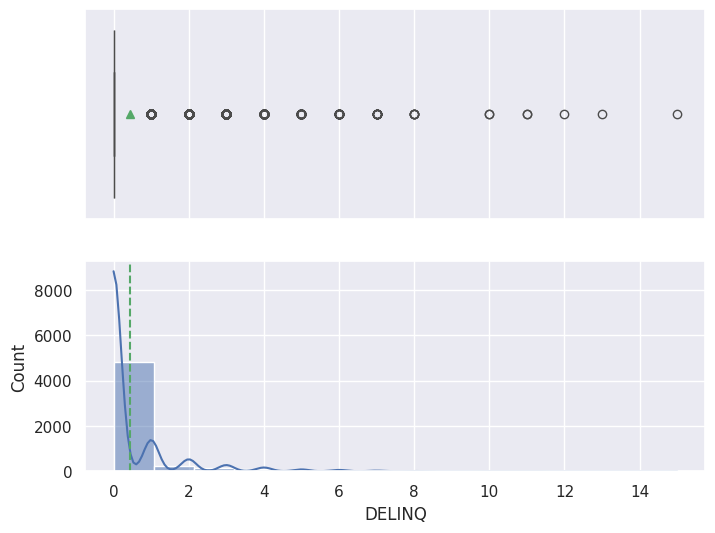

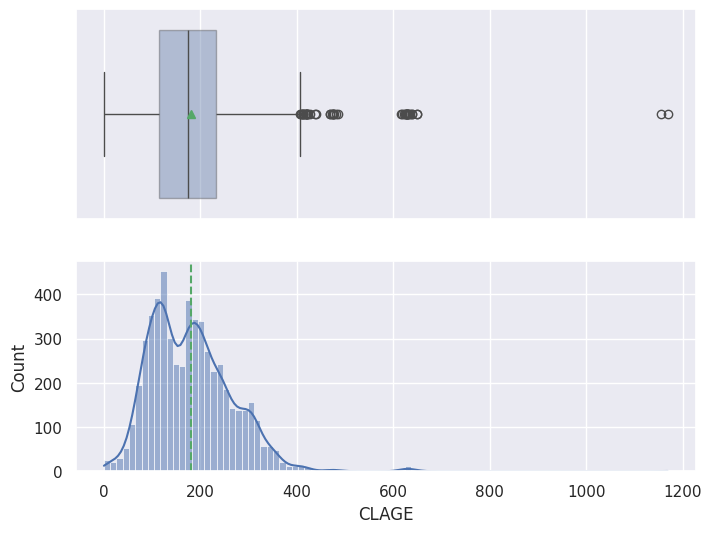

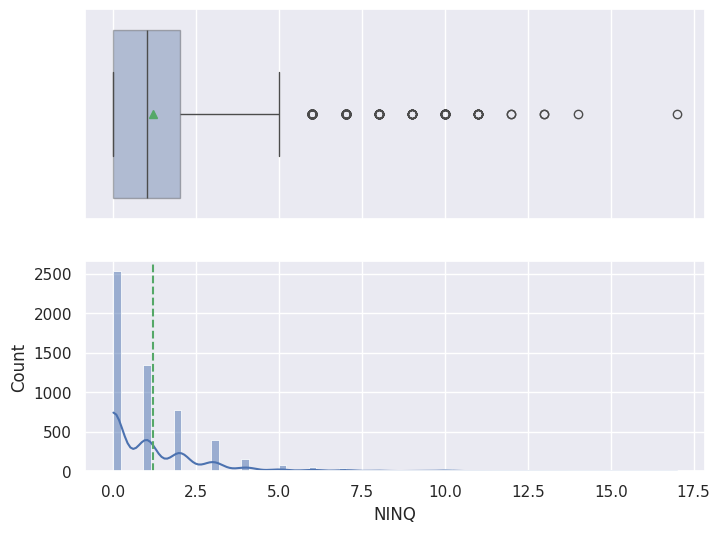

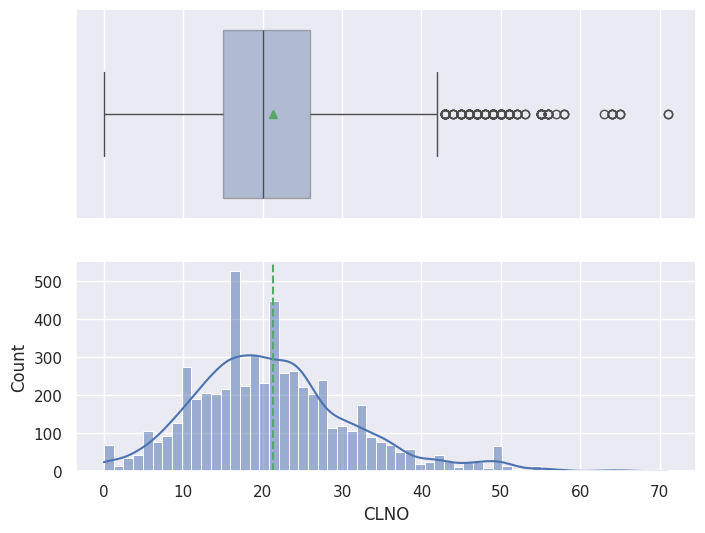

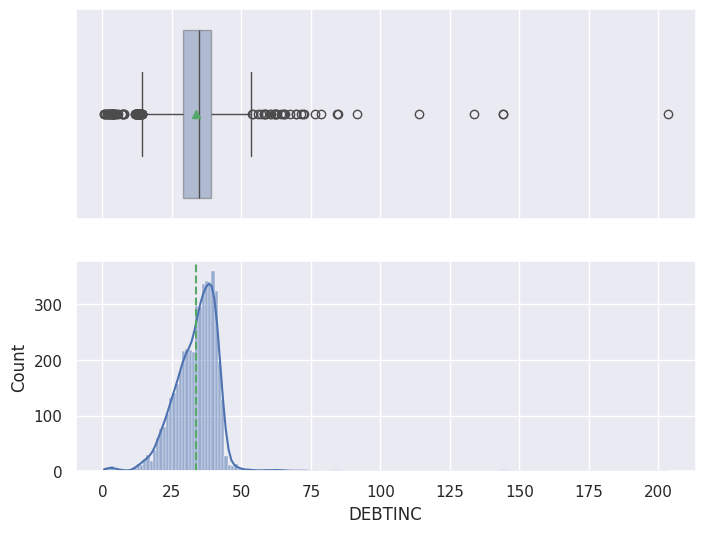

In [ ]:
for col in num_cols:
    hist_boxplot(df, col)

In [ ]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, num_cols):
    outlier_cols = []  # List to store columns with outliers
    for col in num_cols:
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
        upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
        # Check if any values are outside the bounds
        if ((df[col] < lower_bound) | (df[col] > upper_bound)).any():
            outlier_cols.append(col)
    return outlier_cols

# Detect columns with outliers
outlier_cols_iqr = detect_outliers_iqr(df, num_cols)
print("Columns with outliers (IQR method):", outlier_cols_iqr)

Columns with outliers (IQR method): ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']


In [ ]:
# we have a DEBTINC of 200, let's check if it is valid
df[df['DEBTINC'] >= 200]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
4473,1,23300,103783.0,132612.0,DebtCon,Sales,1.0,0.0,NaN,120.347967,0.0,19.0,203.312149


Observation:
- Although the ratio is too high but it is possible as the person might just lose job or have too many debts in relative to the income he earns.

Before applying log transformation, we like to check if there are any zero or negative values in the data as log will not work for zeros or negatives.

In [ ]:
# check any zeros or negatives
for i in outlier_cols_iqr:
  print(i, df[df[i] <= 0].shape[0])

LOAN 0
MORTDUE 0
VALUE 0
YOJ 415
DEROG 4527
DELINQ 4179
CLAGE 2
NINQ 2531
CLNO 62
DEBTINC 0


Observation:
- We have multiple columns with 0 values, so we will apply log transformation with log1p to handle the case.

In [ ]:
# Apply log1p transformation
df[outlier_cols_iqr] = np.log1p(df[outlier_cols_iqr])

AFTER LOG1P TRANSFORMATION

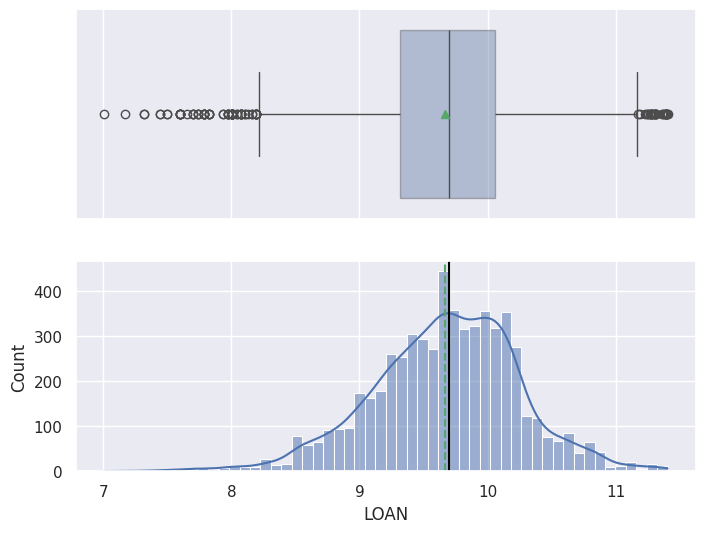

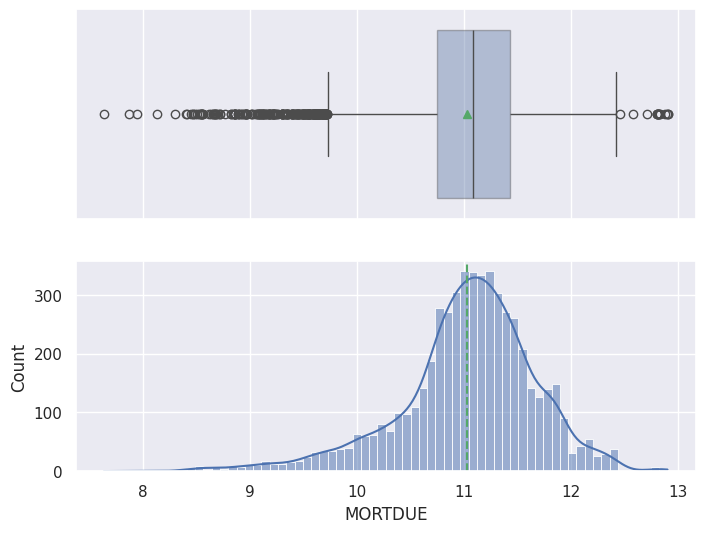

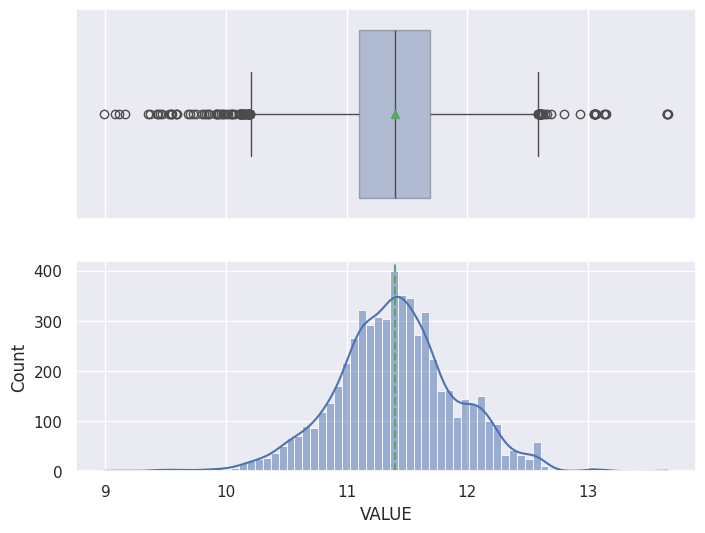

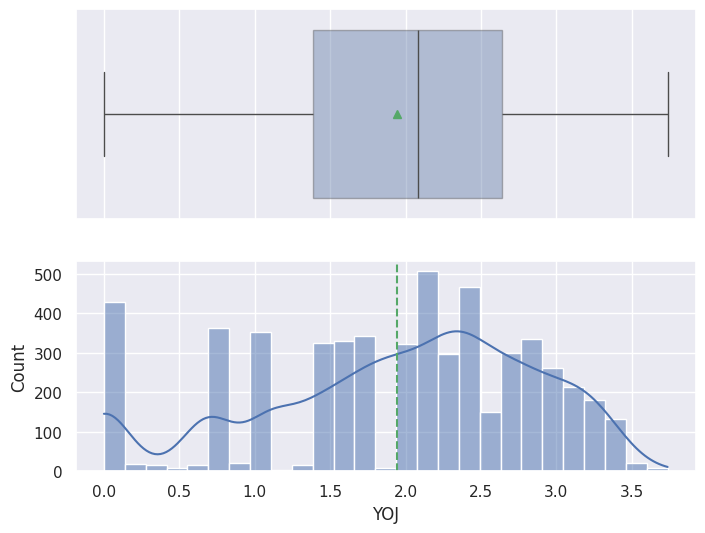

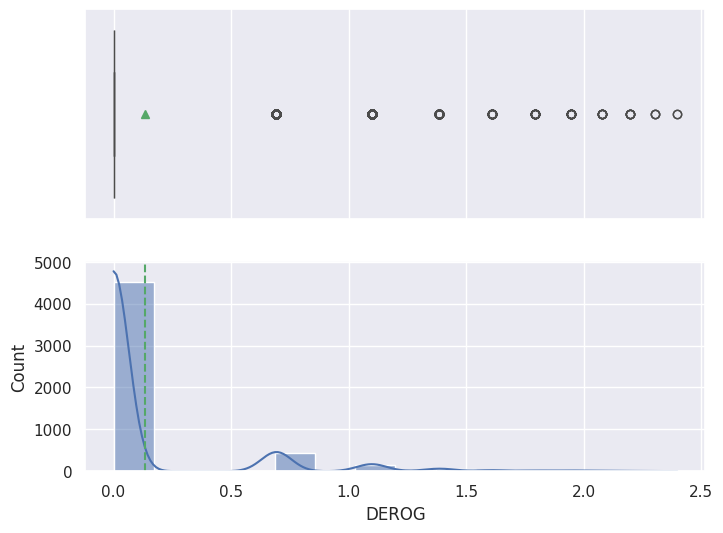

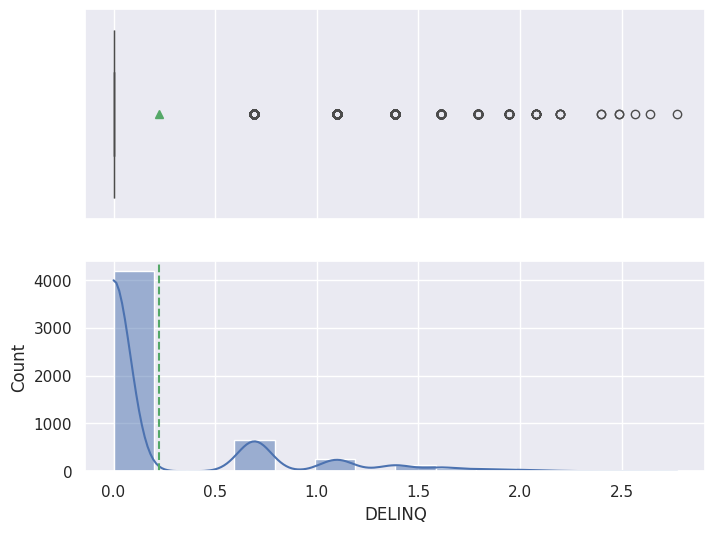

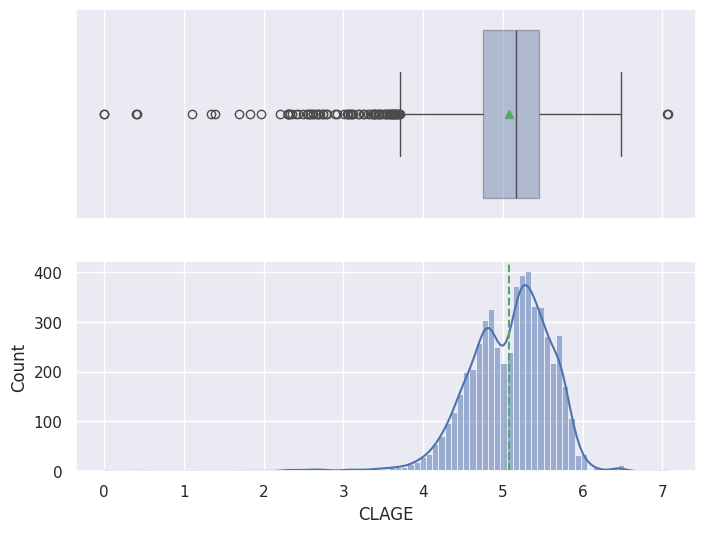

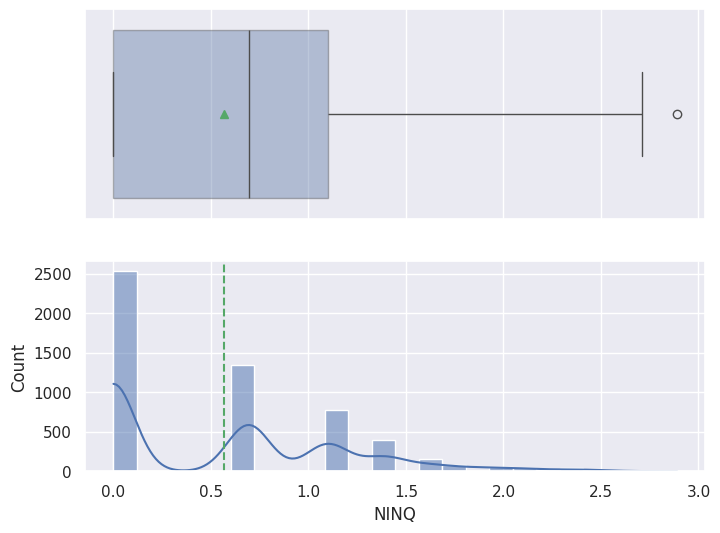

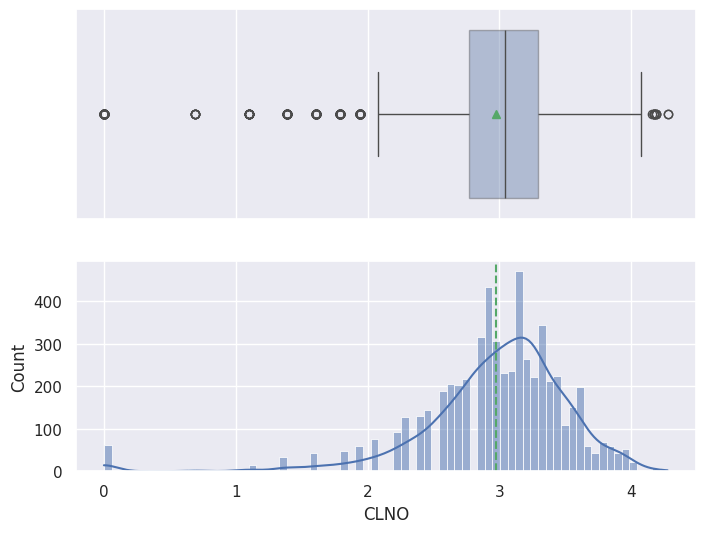

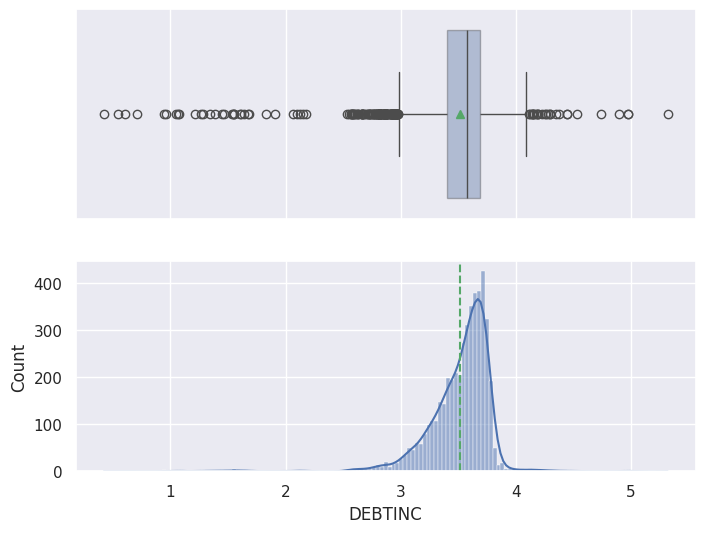

In [ ]:
for col in outlier_cols_iqr:
    hist_boxplot(df, col)

## Treating Missing Values

We will impute the missing values using SimpleImputer() with median values for numerical variables, and most frequent values for categorical variables in the pipeline.

In [ ]:
# let's check percentage of nulls in the dataset
(df.isnull().mean()*100).round(2)

,0
BAD,0.00
LOAN,0.00
MORTDUE,8.69
VALUE,1.88
REASON,4.23
JOB,4.68
YOJ,8.64
DEROG,11.88
DELINQ,9.73
CLAGE,5.17


In [ ]:
# Calculate missing percentage
missing_percent = df.isnull().mean() * 100

# Categorize variables based on missing percentage
low_missing = missing_percent[missing_percent < 5].index.tolist()
moderate_missing = missing_percent[(missing_percent >= 5) & (missing_percent <= 10)].index.tolist()
high_missing = missing_percent[missing_percent > 10].index.tolist()

print("Low Missing (<5%):", low_missing)
print("Moderate Missing (5-10%):", moderate_missing)
print("High Missing (>10%):", high_missing)

Low Missing (<5%): ['BAD', 'LOAN', 'VALUE', 'REASON', 'JOB', 'CLNO']
Moderate Missing (5-10%): ['MORTDUE', 'YOJ', 'DELINQ', 'CLAGE', 'NINQ']
High Missing (>10%): ['DEROG', 'DEBTINC']


## Multicolinearity

MORTDUE and VALUE are closely correlated, so we will do feature engineering to prevent overfitting or instability of the model, creating a new column - loan to value ratio = MORTDUE/VALUE

In [ ]:
df['LTV'] = df['MORTDUE']/df['VALUE']

In [ ]:
df.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'LTV'],
      dtype='object')

In [ ]:
df.head(1)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,LTV
0,1,7.003974,10.160491,10.571983,HomeImp,Other,2.442347,0.0,0.0,4.557729,0.693147,2.302585,NaN,0.961077


In [ ]:
# split the target and data
x = df.drop('BAD', axis=1)
y = df['BAD']

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

- Most of our numerical variables are right-skewed and some have zero values, which we applied log1p transformation to deal with the outliers without changing the distribution.
- There are a lot of missing values in the dataset, ranging from low to high percentage. We will apply SimpleImputer() with median for numerical variables and mode for categorical variables in the data pipeline.
- Number of major derogatory reports (DEROG), number of delinquent credit lines (DELINQ), age of oldest credit line (CLAGE), number of recent credit inquiries(CLNO), debt-to-income (DEBTINC) have some relationship with the target (BAD).
-**DEBTINC**
  - Higher median and higher variance of DEBTINC among the defaults than the non-defaults. The higher DEBTINC, the riskier the loan.
  - Noticeably, there are a lot more missing values of DEBTINC among defaults than non-default, 66% missing values among defaults compared 10% missing values among non-defaults.
  - This imbalance suggests that individuals at higher risk of default may have incomplete financial records, potentially leading to underestimation of their risk profiles. If missing data is imputed, it may not accurately reflect the true financial situation of defaulters, affecting model reliability.
-**CLAGE**
  - CLAGE is lower among defaults than non-defaults.
  - Age of oldest credit line is negatively correlated to the target, which means the longer the credit line is existing, the less likely the applicant is committing a default. However, when investigating more the relationship of CLAGE and CLNO/DEBTINC among defaults/non-defaults, we see this is not always the cases. Many defaults are longer in CLAGE and lower DEBTINC though.
  - There are suspicious outliers in CLAGE, which is greater than 1000 months. The outliers could be data entry mistakes and we should drop them or replace with the median to better reflect the approriate values.
-**DEROG** and **DELINQ** are mostly 0 among non-defaults, but higher among defaults.
- Mortgage due amount (**MORTDUE**) is positively correlated to current value of property (**VALUE**), so there is multicolinearity here. We will need to do feature engineering for the two features to prevent the multicolinearity issue.

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

I want to use ML pipelines for processing and modeling:
- Processing:
  - Numerical cols: Standard Scaler(), Simple Imputer(median)
  - Categorical cols: OneHotEncoder(), Simple Imputer(mode)
- Estimator: try out different algos such as LR, DT, Random Forest, Boosting Classifiers
- Evaluation Metrics: Recall versus Precision
- Evaluate performance train and test to choose the best algo
- Get the best algo to tune hyperparameters using RandomizedSearch()
- Evaluate again the best tuned model
- Conclusion and Recommendation

### ML Pipeline

In [ ]:
print(num_cols)
print(cat_cols)

['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
['REASON', 'JOB']


### Model Evaluation

**Possible prediction errors:**
- **False Positive**: predicting an applicant will default when he/she actually does not (incorrect rejection).
- **False Negative**: preditcting an applicant will not default when he/she actually will (incorrect approval).

**What case is more important?**
- The primary business objective is to accurately identify loan defaulters (true positives) while minimizing false negatives, as missed defaulters can lead to significant financial losses.

**How to reduce the errors/optimize the loss**
- Therefore, our key evaluation metric during model training will be Recall, ensuring that we capture as many defaulters as possible. We will want to maximize Recall by minizing false negatives (identifying true positives as much as possible) to prevent financial losses from default loans.

- However, we may also need to maintain a balance between Recall and Precision when selecting the best model for deployment because while maximizing Recall helps in minimizing false negatives, we must also consider the potential downside of rejecting too many good applicants—as doing so would result in lost revenue from interest payments.
- There is always a tradeoff between Recall and Precision - improving one often worsens the other.
  - Focusing solely on recall (minimizing false negatives) may lead to an excessive rejection of good applicants, reducing the bank’s potential profits.
  - Prioritizing precision (minimizing false positives) increases the risk of approving too many high-risk applicants, leading to a greater number of defaults and financial losses.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Pipeline for numerical variables
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical variables
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

data_pipeline = ColumnTransformer(transformers=[
    # (name, transformer, columns)
    ("num_pipeline", num_pipeline, num_cols),
    ("cat_pipeline", cat_pipeline, cat_cols),
],
    remainder='drop',
    n_jobs=-1
)

In [ ]:
# split train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45, stratify=y)

In [ ]:
# Initialize results DataFrame outside the function
results_df = pd.DataFrame(columns=[
    "Model",
    "Train Precision", "Test Precision",
    "Train Recall", "Test Recall",
    "Train F1-Score", "Test F1-Score",
    "Train Time(s)", "Test Time(s)", "Model Description"
])

# Create a function to train a model and evaluate performance
def run_evaluate_classifier(classifier, classifier_name, x_train, y_train, x_test, y_test, data_pipeline, results_df, description=None):
    """
    Trains and evaluates a single classifier and appends results to an existing DataFrame.

    Parameters:
    classifier: The classifier to train and evaluate.
    classifier_name (str): Name of the classifier for tracking results.
    x_train, y_train: Training data and labels.
    x_test, y_test: Test data and labels.
    data_pipeline: Preprocessing pipeline.
    results_df: DataFrame to store results.
    description (str): Description of the model experiment.

    Returns:
    Updated pd.DataFrame with appended results and the predictor
    """

    # Create a pipeline with preprocessing and the classifier
    full_pipeline_with_predictor = Pipeline([
        ("preparation", data_pipeline),
        ("classifier", classifier)
    ])

    # Start training time
    start_time = time.time()
    full_pipeline_with_predictor.fit(x_train, y_train)
    train_time = np.round(time.time() - start_time, 4)

    # Make predictions
    start_time = time.time()
    y_train_pred = full_pipeline_with_predictor.predict(x_train)
    y_test_pred = full_pipeline_with_predictor.predict(x_test)
    test_time = np.round(time.time() - start_time, 4)

    # Compute Train Scores
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)

    # Compute Test Scores
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Append results to the existing DataFrame
    results_df = pd.concat([results_df, pd.DataFrame([{
        "Model": classifier_name,
        "Train Precision": train_precision, "Test Precision": test_precision,
        "Train Recall": train_recall, "Test Recall": test_recall,
        "Train F1-Score": train_f1, "Test F1-Score": test_f1,
        "Train Time(s)": train_time, "Test Time(s)": test_time,
        "Model Description": description
    }])], ignore_index=True)

    return results_df, full_pipeline_with_predictor

###  Hyperparameter Tuning

**Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [ ]:
import time

# create a function to tune models
def randomized_search_with_pipeline(classifier, classifier_name, param_dist, x_train, y_train, x_test, y_test, results_df,
                                    data_pipeline, n_splits=5, n_iter=50, scoring="recall", n_jobs=-1, random_state=42):
    """
    Runs RandomizedSearchCV with a preprocessing pipeline and classifier.

    Parameters:
    classifier: The classifier to tune.
    param_distributions: Dictionary of hyperparameters to search.
    x_train, y_train: Training data.
    data_pipeline: Preprocessing pipeline.
    cv: Number of cross-validation folds (default=5).
    n_iter: Number of iterations for randomized search (default=20).
    scoring: Scoring metric (default="f1").
    n_jobs: Number of CPU cores to use (default=-1 for all).
    random_state: Random state for reproducibility.

    Returns:
    Best model from RandomizedSearchCV.
    """

    # Create a full pipeline with preprocessing and the classifier
    full_pipeline_with_predictor = Pipeline([
        ("preparation", data_pipeline),
        ("classifier", classifier)
    ])

    # Create a StratifiedKFold object
    stratified_cv = StratifiedKFold(
        n_splits=n_splits,
        shuffle=True,
        random_state=random_state
    )

    # Run randomized search
    random_search = RandomizedSearchCV(
        estimator=full_pipeline_with_predictor,
        param_distributions=param_dist,
        n_iter=n_iter,
        scoring=scoring,
        cv=stratified_cv,
        n_jobs=n_jobs,
        random_state=random_state,
        verbose=2
    )

    # Start time
    start = time.time()
    random_search.fit(x_train, y_train)
    train_time = round(time.time() - start, 2)

    # get the best estimator
    best_model = random_search.best_estimator_

    # Make predictions
    start_time = time.time()
    y_train_pred = best_model.predict(x_train)
    y_test_pred = best_model.predict(x_test)
    test_time = np.round(time.time() - start_time, 4)

    # Compute Train Scores
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)

    # Compute Test Scores
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    description = random_search.best_params_

    # Append results to the existing DataFrame
    results_df = pd.concat([results_df, pd.DataFrame([{
        "Model": classifier_name,
        "Train Precision": train_precision, "Test Precision": test_precision,
        "Train Recall": train_recall, "Test Recall": test_recall,
        "Train F1-Score": train_f1, "Test F1-Score": test_f1,
        "Train Time(s)": train_time, "Test Time(s)": test_time,
        "Model Description": description
    }])], ignore_index=True)

    return results_df, best_model


### Function for Feature Importance

In [ ]:
fn, tn, fp, tp

In [ ]:
def plot_feature_importances(model):
  # Extract the classifier from the pipeline
  classifier = model.named_steps['classifier']

  # For tree-based models (Random Forest, XGBoost, etc.)
  if hasattr(classifier, 'feature_importances_'):
      feature_importances = classifier.feature_importances_
      feature_names = data_pipeline.get_feature_names_out()

      importance_df = pd.DataFrame({
          'feature': feature_names,
          'importance': feature_importances
      }).sort_values('importance', ascending=False)

  # For linear models (Logistic Regression)
  elif hasattr(classifier, 'coef_'):
      feature_importances = np.abs(classifier.coef_[0])
      feature_names = data_pipeline.get_feature_names_out()

      importance_df = pd.DataFrame({
          'feature': feature_names,
          'importance': feature_importances
      }).sort_values('importance', ascending=False)

  plt.figure(figsize = (8, 10))
  plt.ylabel("Features")
  plt.xlabel("Importance Scores")

  sns.barplot(x= importance_df.importance, y=importance_df.feature);

### Logistic Regression Classifier

In [ ]:
import time
# Run Logistic Regression
results_df, model_lr = run_evaluate_classifier(LogisticRegression(random_state=42),
                                 "Logistic Regression",
                                 x_train, y_train, x_test, y_test, data_pipeline, results_df, "Base Model")
# Display results
from IPython.display import display
display(results_df)

,Model,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score,Train Time(s),Test Time(s),Model Description
0,Logistic Regression,0.696017,0.688679,0.349106,0.306723,0.464986,0.424419,2.4219,0.0817,Base Model


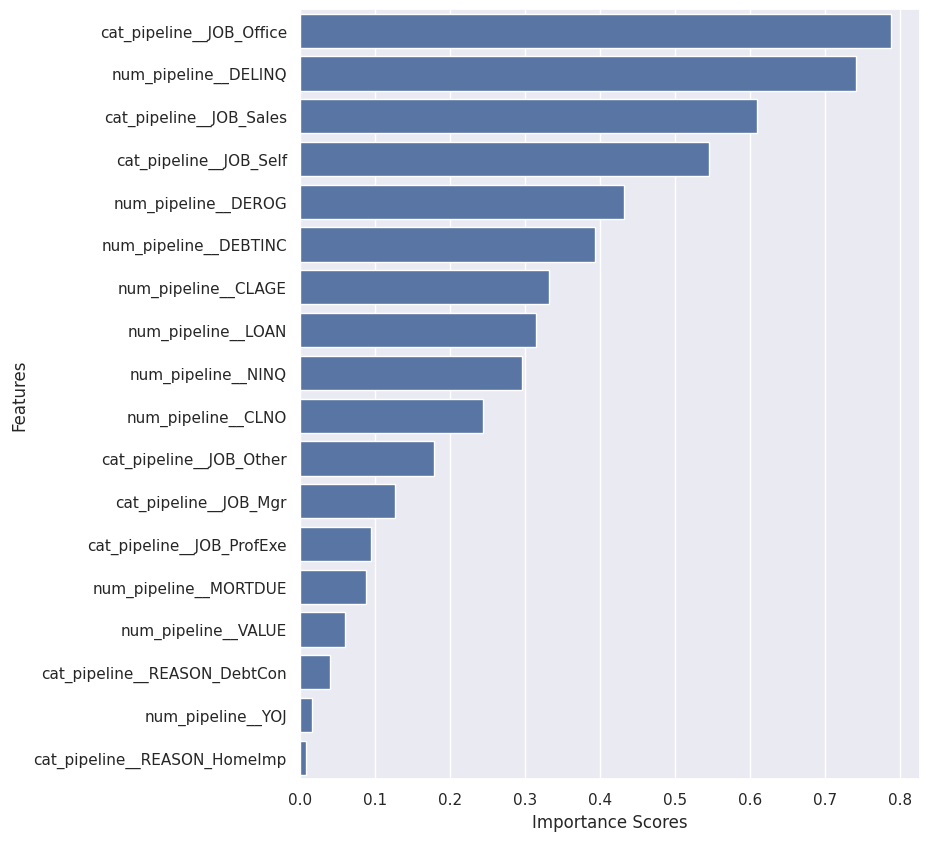

In [ ]:
plot_feature_importances(model_lr)

Observation:
- The model is performing poorly, test recall is 0.30. It shows Job_Office is the most important feature, which is not what we expected.

#### Logistic Regression Tuning

In [ ]:
# Tuning Logistic Regression
param_dist_lr = {
    "classifier__C": [0.001, 0.01, 0.1, 1, 10, 100],
    "classifier__penalty": ["l1", "l2", "elasticnet", None],
    "classifier__solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "classifier__max_iter": [100, 200, 500]
}

# Note: Not all penalty and solver combinations are valid
# - 'l1' penalty works with 'liblinear' and 'saga' solvers
# - 'l2' penalty works with all solvers
# - 'elasticnet' penalty only works with 'saga' solver
# - None (no penalty) works with 'newton-cg', 'lbfgs', 'sag', and 'saga'

# Run the randomized search with the pipeline
results_df, tuned_lr = randomized_search_with_pipeline(
    classifier=LogisticRegression(random_state=45),
    classifier_name="Logistic Regression - Tuned",
    param_dist=param_dist_lr,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    results_df=results_df,
    data_pipeline=data_pipeline
)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [ ]:
display(results_df)

,Model,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score,Train Time(s),Test Time(s),Model Description
0,Logistic Regression,0.696017,0.688679,0.349106,0.306723,0.464986,0.424419,2.4219,0.0817,Base Model
1,Logistic Regression - Tuned,0.694561,0.688679,0.349106,0.306723,0.464661,0.424419,14.8700,0.0580,"{'classifier__solver': 'newton-cg', 'classifie..."


- Even with tuning, Logistic Regression is not performing better

### Decision Tree

In [ ]:
# Run Decision Tree
results_df, model_dt = run_evaluate_classifier(DecisionTreeClassifier(class_weight={0:0.8, 1:0.2}, random_state=45),
                                 "Decision Tree",
                                 x_train, y_train, x_test, y_test, data_pipeline, results_df, "Base Model")
# Display results
from IPython.display import display
display(results_df)

,Model,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score,Train Time(s),Test Time(s),Model Description
0,Logistic Regression,0.696017,0.688679,0.349106,0.306723,0.464986,0.424419,2.4219,0.0817,Base Model
1,Logistic Regression - Tuned,0.694561,0.688679,0.349106,0.306723,0.464661,0.424419,14.8700,0.0580,"{'classifier__solver': 'newton-cg', 'classifie..."
2,Decision Tree,1.000000,0.693878,1.000000,0.714286,1.000000,0.703934,0.1377,0.0411,Base Model


- Decision Tree is performing better with a Test Recall of 71%. However, there is an overfitting issue as its Train Recall is 100%.

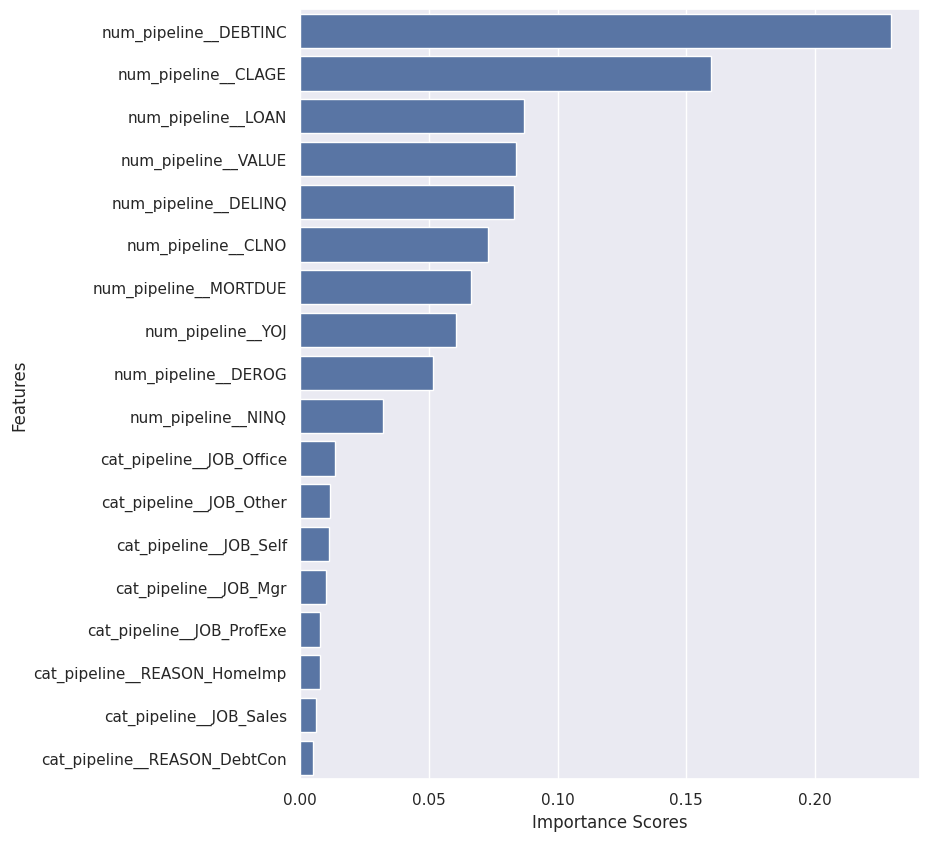

In [ ]:
plot_feature_importances(model_dt)

#### Decision Tree Tuning

In [ ]:
# tuning Decision Tree
param_dist_dt = {
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_depth": [None, 5, 10, 20, 30],
    "classifier__min_samples_leaf": [1, 2, 5, 10]
}

# Run the randomized search with the pipeline
results_df, tuned_dt = randomized_search_with_pipeline(
    classifier=DecisionTreeClassifier(class_weight={0:0.8, 1:0.2}, random_state=42),
    classifier_name="Decision Tree - Tuned",
    param_dist=param_dist_dt,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    results_df=results_df,
    data_pipeline=data_pipeline
)
display(results_df)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


,Model,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score,Train Time(s),Test Time(s),Model Description
0,Logistic Regression,0.696017,0.688679,0.349106,0.306723,0.464986,0.424419,2.4219,0.0817,Base Model
1,Logistic Regression - Tuned,0.694561,0.688679,0.349106,0.306723,0.464661,0.424419,14.8700,0.0580,"{'classifier__solver': 'newton-cg', 'classifie..."
2,Decision Tree,1.000000,0.693878,1.000000,0.714286,1.000000,0.703934,0.1377,0.0411,Base Model
3,Decision Tree - Tuned,1.000000,0.729730,1.000000,0.680672,1.000000,0.704348,16.4400,0.0614,"{'classifier__min_samples_leaf': 1, 'classifie..."


- Decision Tree with tuning performs worse as its Test Recall decreases, 68% and its Train Recall is perfect, which indicates an overfitting issue.

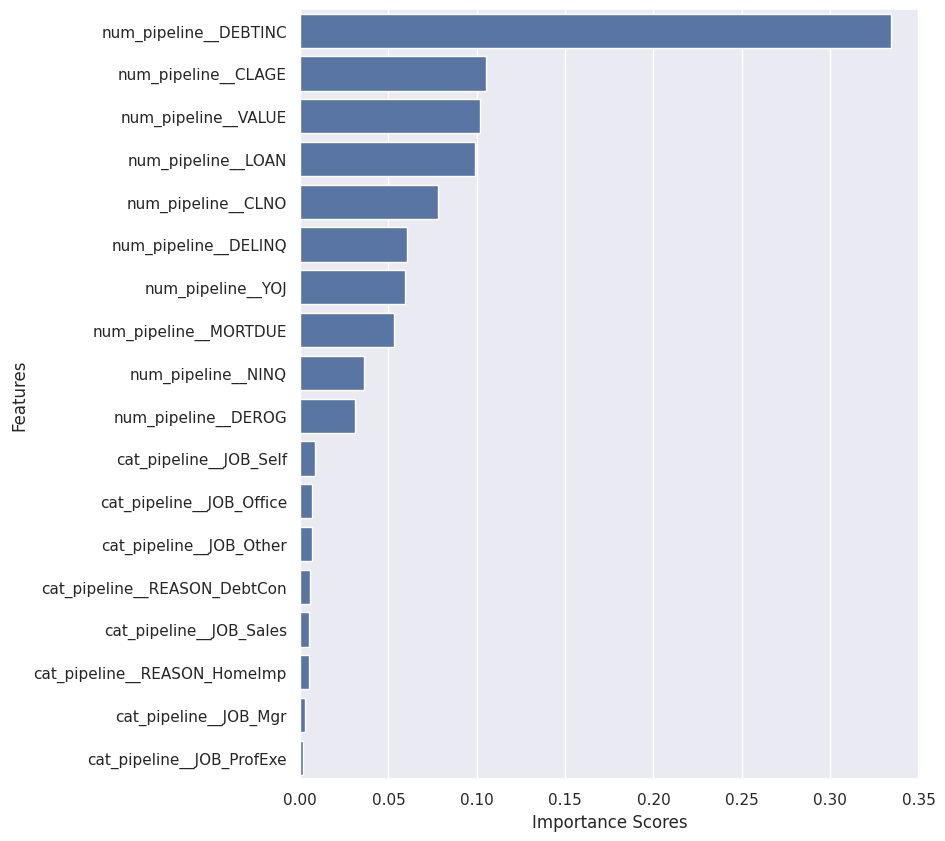

In [ ]:
plot_feature_importances(tuned_dt)

### Random Forest Classifier

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [ ]:
# Run Random Forest
results_df, model_rf = run_evaluate_classifier(RandomForestClassifier(random_state=42, class_weight="balanced"),
                                 "Random Forest Classifier",
                                 x_train, y_train, x_test, y_test, data_pipeline, results_df, "Base Model")
# Display results
from IPython.display import display
display(results_df)

,Model,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score,Train Time(s),Test Time(s),Model Description
0,Logistic Regression,0.696017,0.688679,0.349106,0.306723,0.464986,0.424419,2.4219,0.0817,Base Model
1,Logistic Regression - Tuned,0.694561,0.688679,0.349106,0.306723,0.464661,0.424419,14.8700,0.0580,"{'classifier__solver': 'newton-cg', 'classifie..."
2,Decision Tree,1.000000,0.693878,1.000000,0.714286,1.000000,0.703934,0.1377,0.0411,Base Model
3,Decision Tree - Tuned,1.000000,0.729730,1.000000,0.680672,1.000000,0.704348,16.4400,0.0614,"{'classifier__min_samples_leaf': 1, 'classifie..."
4,Random Forest Classifier,1.000000,0.851064,1.000000,0.672269,1.000000,0.751174,1.3210,0.1268,Base Model


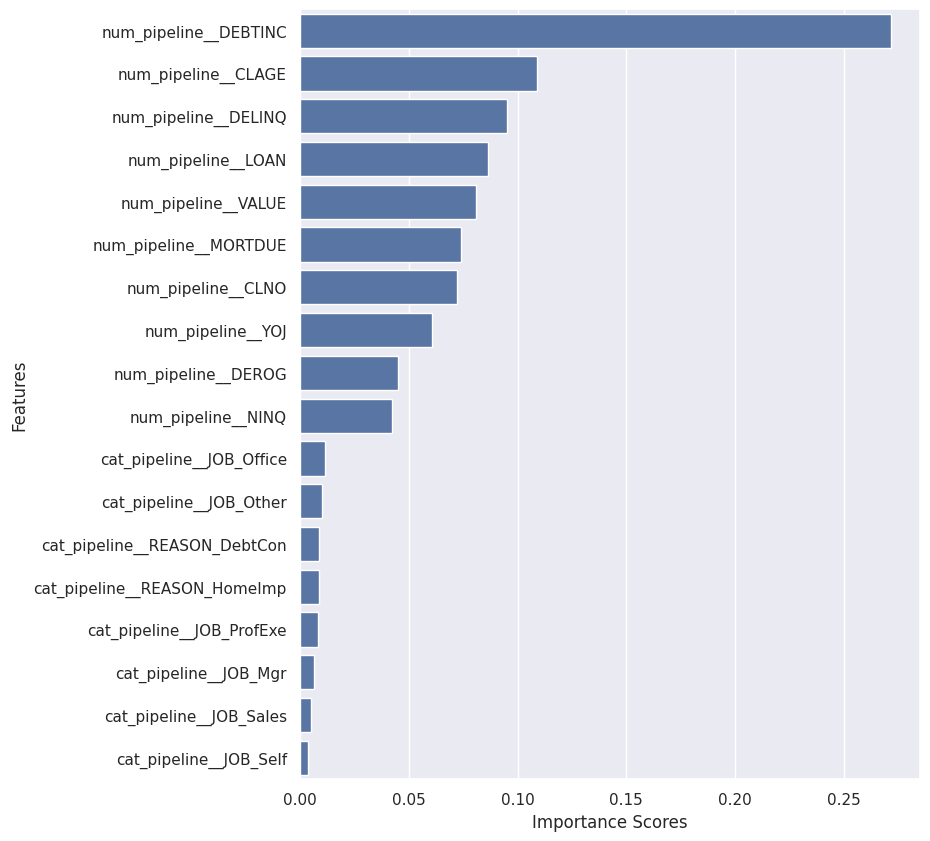

In [ ]:
plot_feature_importances(model_rf)

Observation:
- Random Forest also has overfitting issue with the train recall of 1.0
- The most important feature is DEBTINC similar to Decision Tree.

#### Random Forest Tuning

In [ ]:
# Grid of parameters to choose from
param_dist_rf = {"classifier__n_estimators": [100, 250, 500],
             "classifier__min_samples_leaf": np.arange(1, 4, 1),
              # "classifier_max_samples": [0.5, 0.8, 1.0],
            # "classifier_max_depth": [None, 5, 10, 20],
             "classifier__max_features": ['sqrt', 'log2', 'auto']}

# Run the randomized search with the pipeline
results_df, tuned_rf = randomized_search_with_pipeline(
    classifier=RandomForestClassifier(random_state=42, class_weight="balanced"),
    classifier_name="Random Forest - Tuned",
    param_dist=param_dist_rf,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    results_df=results_df,
    data_pipeline=data_pipeline
)

# Display results
display(results_df)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


,Model,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score,Train Time(s),Test Time(s),Model Description
0,Logistic Regression,0.696017,0.688679,0.349106,0.306723,0.464986,0.424419,2.4219,0.0817,Base Model
1,Logistic Regression - Tuned,0.694561,0.688679,0.349106,0.306723,0.464661,0.424419,14.8700,0.0580,"{'classifier__solver': 'newton-cg', 'classifie..."
2,Decision Tree,1.000000,0.693878,1.000000,0.714286,1.000000,0.703934,0.1377,0.0411,Base Model
3,Decision Tree - Tuned,1.000000,0.729730,1.000000,0.680672,1.000000,0.704348,16.4400,0.0614,"{'classifier__min_samples_leaf': 1, 'classifie..."
4,Random Forest Classifier,1.000000,0.851064,1.000000,0.672269,1.000000,0.751174,1.3210,0.1268,Base Model
5,Random Forest - Tuned,0.925197,0.802632,0.988433,0.768908,0.955770,0.785408,180.9200,0.1195,"{'classifier__n_estimators': 100, 'classifier_..."


- The Tuned Random Forest is performing slightly better but still having an overfitting issue.

### Boosting Classifiers

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Run AdaBoost
results_df, model_ada = run_evaluate_classifier(
    AdaBoostClassifier(random_state=42),
    "AdaBoost",
    x_train, y_train, x_test, y_test, data_pipeline, results_df, description="Base Model"
)

# Display results
display(results_df)

,Model,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score,Train Time(s),Test Time(s),Model Description
0,Logistic Regression,0.696017,0.688679,0.349106,0.306723,0.464986,0.424419,2.4219,0.0817,Base Model
1,Logistic Regression - Tuned,0.694561,0.688679,0.349106,0.306723,0.464661,0.424419,14.8700,0.0580,"{'classifier__solver': 'newton-cg', 'classifie..."
2,Decision Tree,1.000000,0.693878,1.000000,0.714286,1.000000,0.703934,0.1377,0.0411,Base Model
3,Decision Tree - Tuned,1.000000,0.729730,1.000000,0.680672,1.000000,0.704348,16.4400,0.0614,"{'classifier__min_samples_leaf': 1, 'classifie..."
4,Random Forest Classifier,1.000000,0.851064,1.000000,0.672269,1.000000,0.751174,1.3210,0.1268,Base Model
5,Random Forest - Tuned,0.925197,0.802632,0.988433,0.768908,0.955770,0.785408,180.9200,0.1195,"{'classifier__n_estimators': 100, 'classifier_..."
6,AdaBoost,0.805097,0.796178,0.564669,0.525210,0.663782,0.632911,0.4050,0.0793,Base Model


Observation:
- AdaBoost performs poorly with Recall of 56% and 52% for train and test set accordingly.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Run Gradient Boosting
results_df, model_gbc = run_evaluate_classifier(
    GradientBoostingClassifier(random_state=42),
    "Gradient Boosting",
    x_train, y_train, x_test, y_test, data_pipeline, results_df, description="Base Model"
)

# Display results
display(results_df)

,Model,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score,Train Time(s),Test Time(s),Model Description
0,Logistic Regression,0.696017,0.688679,0.349106,0.306723,0.464986,0.424419,2.4219,0.0817,Base Model
1,Logistic Regression - Tuned,0.694561,0.688679,0.349106,0.306723,0.464661,0.424419,14.8700,0.0580,"{'classifier__solver': 'newton-cg', 'classifie..."
2,Decision Tree,1.000000,0.693878,1.000000,0.714286,1.000000,0.703934,0.1377,0.0411,Base Model
3,Decision Tree - Tuned,1.000000,0.729730,1.000000,0.680672,1.000000,0.704348,16.4400,0.0614,"{'classifier__min_samples_leaf': 1, 'classifie..."
4,Random Forest Classifier,1.000000,0.851064,1.000000,0.672269,1.000000,0.751174,1.3210,0.1268,Base Model
5,Random Forest - Tuned,0.925197,0.802632,0.988433,0.768908,0.955770,0.785408,180.9200,0.1195,"{'classifier__n_estimators': 100, 'classifier_..."
6,AdaBoost,0.805097,0.796178,0.564669,0.525210,0.663782,0.632911,0.4050,0.0793,Base Model
7,Gradient Boosting,0.877524,0.832432,0.685594,0.647059,0.769776,0.728132,1.5032,0.0498,Base Model


- Gradient Boosting is doing better compared to AdaBoosting with a Recall of 69% and 65% for train and test set accordingly. However, train time is longer.

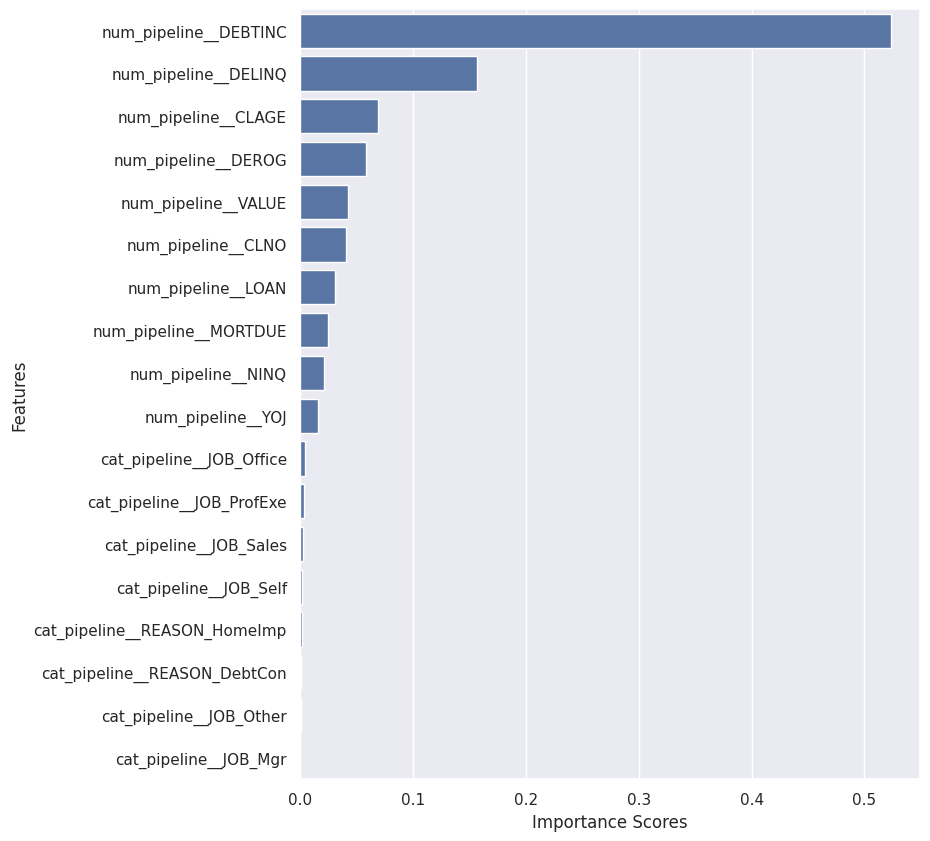

In [ ]:
plot_feature_importances(model_gbc)

#### Gradient Boosting Tuning

In [ ]:
# For Sklearn's GradientBoostingClassifier
param_dist_gbc = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__learning_rate": [0.01, 0.05, 0.1],  # Lower learning rates help prevent overfitting
    "classifier__max_depth": [2, 3, 4],  # Shallower trees (reduced from typical 5-7)
    "classifier__min_samples_split": [5, 10, 20],  # Require more samples to split a node
    "classifier__min_samples_leaf": [10, 20, 30],  # Require more samples in leaf nodes
    "classifier__subsample": [0.7, 0.8, 0.9],  # Use only a fraction of samples per tree
    "classifier__max_features": [0.5, 0.7, 'sqrt']  # Limit features considered per split
}

# Run with your existing function
results_df, tuned_gbc = randomized_search_with_pipeline(
    classifier=GradientBoostingClassifier(random_state=42),
    classifier_name="Gradient Boosting - Regularized",
    param_dist=param_dist_gbc,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    results_df=results_df,
    data_pipeline=data_pipeline
)

# Display results
display(results_df)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


,Model,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score,Train Time(s),Test Time(s),Model Description
0,Logistic Regression,0.696017,0.688679,0.349106,0.306723,0.464986,0.424419,2.4219,0.0817,Base Model
1,Logistic Regression - Tuned,0.694561,0.688679,0.349106,0.306723,0.464661,0.424419,14.8700,0.0580,"{'classifier__solver': 'newton-cg', 'classifie..."
2,Decision Tree,1.000000,0.693878,1.000000,0.714286,1.000000,0.703934,0.1377,0.0411,Base Model
3,Decision Tree - Tuned,1.000000,0.729730,1.000000,0.680672,1.000000,0.704348,16.4400,0.0614,"{'classifier__min_samples_leaf': 1, 'classifie..."
4,Random Forest Classifier,1.000000,0.851064,1.000000,0.672269,1.000000,0.751174,1.3210,0.1268,Base Model
5,Random Forest - Tuned,0.925197,0.802632,0.988433,0.768908,0.955770,0.785408,180.9200,0.1195,"{'classifier__n_estimators': 100, 'classifier_..."
6,AdaBoost,0.805097,0.796178,0.564669,0.525210,0.663782,0.632911,0.4050,0.0793,Base Model
7,Gradient Boosting,0.877524,0.832432,0.685594,0.647059,0.769776,0.728132,1.5032,0.0498,Base Model
8,Gradient Boosting - Regularized,0.962704,0.857868,0.868559,0.710084,0.913212,0.777011,232.1700,0.0662,"{'classifier__subsample': 0.9, 'classifier__n_..."


- The tuned Gradient Boosting is doing much better with 71% and 87% for test and train accordingly, but it took a much longer time to train the model.

In [ ]:
from xgboost import XGBClassifier

# Run XGBoost
results_df, model_xgb = run_evaluate_classifier(
    XGBClassifier(random_state=42, scale_pos_weight=8),
    "XGBoost",
    x_train, y_train, x_test, y_test, data_pipeline, results_df, description="Base Model"
)

# Display results
display(results_df)

,Model,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score,Train Time(s),Test Time(s),Model Description
0,Logistic Regression,0.696017,0.688679,0.349106,0.306723,0.464986,0.424419,2.4219,0.0817,Base Model
1,Logistic Regression - Tuned,0.694561,0.688679,0.349106,0.306723,0.464661,0.424419,14.8700,0.0580,"{'classifier__solver': 'newton-cg', 'classifie..."
2,Decision Tree,1.000000,0.693878,1.000000,0.714286,1.000000,0.703934,0.1377,0.0411,Base Model
3,Decision Tree - Tuned,1.000000,0.729730,1.000000,0.680672,1.000000,0.704348,16.4400,0.0614,"{'classifier__min_samples_leaf': 1, 'classifie..."
4,Random Forest Classifier,1.000000,0.851064,1.000000,0.672269,1.000000,0.751174,1.3210,0.1268,Base Model
5,Random Forest - Tuned,0.925197,0.802632,0.988433,0.768908,0.955770,0.785408,180.9200,0.1195,"{'classifier__n_estimators': 100, 'classifier_..."
6,AdaBoost,0.805097,0.796178,0.564669,0.525210,0.663782,0.632911,0.4050,0.0793,Base Model
7,Gradient Boosting,0.877524,0.832432,0.685594,0.647059,0.769776,0.728132,1.5032,0.0498,Base Model
8,Gradient Boosting - Regularized,0.962704,0.857868,0.868559,0.710084,0.913212,0.777011,232.1700,0.0662,"{'classifier__subsample': 0.9, 'classifier__n_..."
9,XGBoost,0.975385,0.786290,1.000000,0.819328,0.987539,0.802469,0.7751,0.1418,Base Model


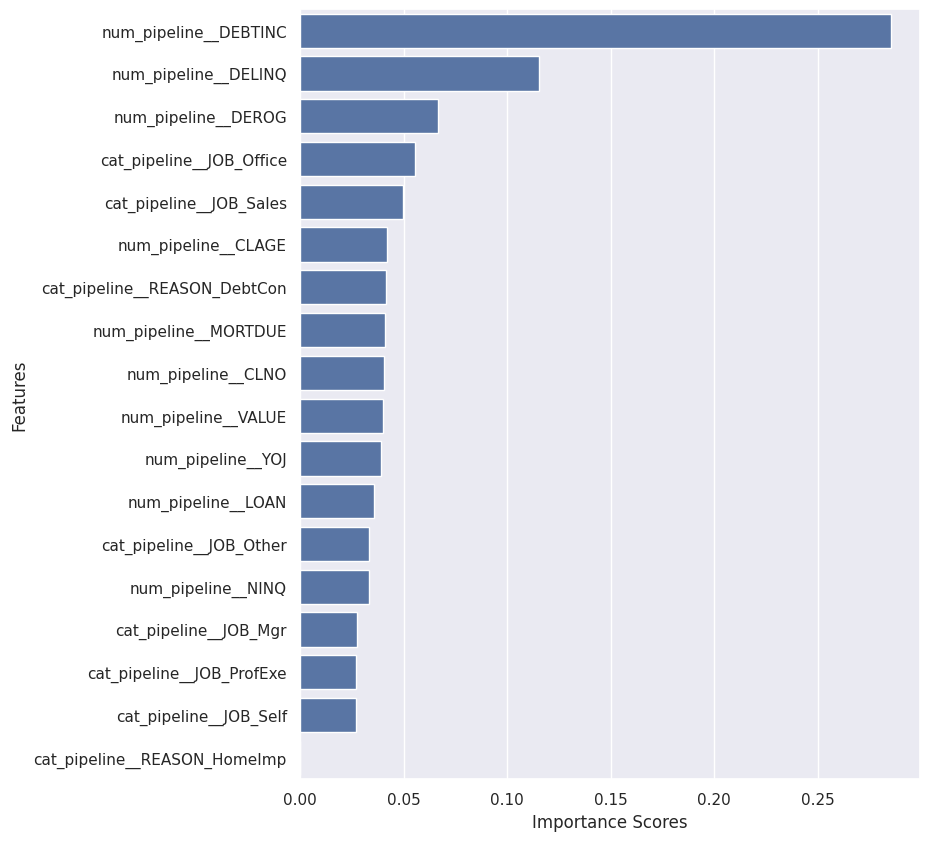

In [ ]:
plot_feature_importances(model_xgb)

#### XGBoosting Tuning

In [ ]:
# For XGBoost
param_dist_xgb = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__learning_rate": [0.01, 0.05, 0.1],
    "classifier__max_depth": [2, 3, 4],
    "classifier__min_child_weight": [5, 10, 20],  # Similar to min_samples_leaf
    "classifier__subsample": [0.7, 0.8, 0.9],
    "classifier__colsample_bytree": [0.5, 0.7, 0.9],  # Column sampling per tree
    "classifier__reg_alpha": [0.1, 1, 10],  # L1 regularization
    "classifier__reg_lambda": [0.1, 1, 10]  # L2 regularization
}

# Run with your existing function
results_df, tuned_xgb = randomized_search_with_pipeline(
    classifier=XGBClassifier(random_state=42),
    classifier_name="XGBoosting - Tuned",
    param_dist=param_dist_xgb,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    results_df=results_df,
    data_pipeline=data_pipeline
)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [ ]:
display(results_df)

,Model,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score,Train Time(s),Test Time(s),Model Description
0,Logistic Regression,0.696017,0.688679,0.349106,0.306723,0.464986,0.424419,2.4219,0.0817,Base Model
1,Logistic Regression - Tuned,0.694561,0.688679,0.349106,0.306723,0.464661,0.424419,14.8700,0.0580,"{'classifier__solver': 'newton-cg', 'classifie..."
2,Decision Tree,1.000000,0.693878,1.000000,0.714286,1.000000,0.703934,0.1377,0.0411,Base Model
3,Decision Tree - Tuned,1.000000,0.729730,1.000000,0.680672,1.000000,0.704348,16.4400,0.0614,"{'classifier__min_samples_leaf': 1, 'classifie..."
4,Random Forest Classifier,1.000000,0.851064,1.000000,0.672269,1.000000,0.751174,1.3210,0.1268,Base Model
5,Random Forest - Tuned,0.925197,0.802632,0.988433,0.768908,0.955770,0.785408,180.9200,0.1195,"{'classifier__n_estimators': 100, 'classifier_..."
6,AdaBoost,0.805097,0.796178,0.564669,0.525210,0.663782,0.632911,0.4050,0.0793,Base Model
7,Gradient Boosting,0.877524,0.832432,0.685594,0.647059,0.769776,0.728132,1.5032,0.0498,Base Model
8,Gradient Boosting - Regularized,0.962704,0.857868,0.868559,0.710084,0.913212,0.777011,232.1700,0.0662,"{'classifier__subsample': 0.9, 'classifier__n_..."
9,XGBoost,0.975385,0.786290,1.000000,0.819328,0.987539,0.802469,0.7751,0.1418,Base Model


- XGBoosting with tuning performs worse than XGBoosting and its training time is longer.

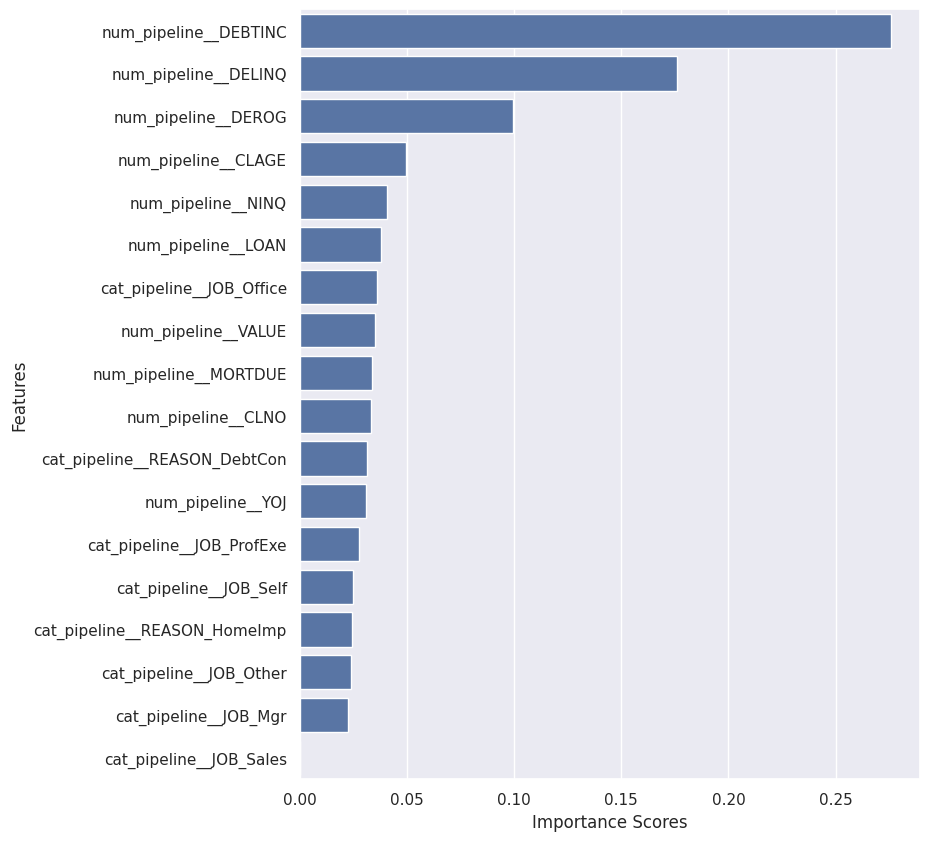

In [ ]:
plot_feature_importances(tuned_xgb)

#### Light Gradient Boosting

In [ ]:
import lightgbm as lgb

# Run LightGBM
results_df, model_lgb = run_evaluate_classifier(
    lgb.LGBMClassifier(random_state=42, class_weight="balanced"),
    "LightGBM",
    x_train, y_train, x_test, y_test, data_pipeline, results_df, description="Base Model"
)

# Display results
display(results_df)

[LightGBM] [Info] Number of positive: 951, number of negative: 3817
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1450
[LightGBM] [Info] Number of data points in the train set: 4768, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


,Model,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score,Train Time(s),Test Time(s),Model Description
0,Logistic Regression,0.696017,0.688679,0.349106,0.306723,0.464986,0.424419,2.4219,0.0817,Base Model
1,Logistic Regression - Tuned,0.694561,0.688679,0.349106,0.306723,0.464661,0.424419,14.8700,0.0580,"{'classifier__solver': 'newton-cg', 'classifie..."
2,Decision Tree,1.000000,0.693878,1.000000,0.714286,1.000000,0.703934,0.1377,0.0411,Base Model
3,Decision Tree - Tuned,1.000000,0.729730,1.000000,0.680672,1.000000,0.704348,16.4400,0.0614,"{'classifier__min_samples_leaf': 1, 'classifie..."
4,Random Forest Classifier,1.000000,0.851064,1.000000,0.672269,1.000000,0.751174,1.3210,0.1268,Base Model
5,Random Forest - Tuned,0.925197,0.802632,0.988433,0.768908,0.955770,0.785408,180.9200,0.1195,"{'classifier__n_estimators': 100, 'classifier_..."
6,AdaBoost,0.805097,0.796178,0.564669,0.525210,0.663782,0.632911,0.4050,0.0793,Base Model
7,Gradient Boosting,0.877524,0.832432,0.685594,0.647059,0.769776,0.728132,1.5032,0.0498,Base Model
8,Gradient Boosting - Regularized,0.962704,0.857868,0.868559,0.710084,0.913212,0.777011,232.1700,0.0662,"{'classifier__subsample': 0.9, 'classifier__n_..."
9,XGBoost,0.975385,0.786290,1.000000,0.819328,0.987539,0.802469,0.7751,0.1418,Base Model


In [ ]:
# Define parameter grid for LightGBM
param_dist_lgb = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__learning_rate": [0.01, 0.05, 0.1],
    "classifier__num_leaves": [31, 63, 127],
    "classifier__max_depth": [3, 5, -1],
    "classifier__is_unbalance": [True]  # Handle imbalanced data
}

# Run LightGBM with hyperparameter tuning
results_df, tuned_lgb = randomized_search_with_pipeline(
    classifier=lgb.LGBMClassifier(random_state=42),
    classifier_name="LightGBM - Tuned",
    param_dist=param_dist_lgb,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    results_df=results_df,
    data_pipeline=data_pipeline
)

# Display results
display(results_df)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 951, number of negative: 3817
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1450
[LightGBM] [Info] Number of data points in the train set: 4768, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199455 -> initscore=-1.389706
[LightGBM] [Info] Start training from score -1.389706


,Model,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score,Train Time(s),Test Time(s),Model Description
0,Logistic Regression,0.696017,0.688679,0.349106,0.306723,0.464986,0.424419,2.4219,0.0817,Base Model
1,Logistic Regression - Tuned,0.694561,0.688679,0.349106,0.306723,0.464661,0.424419,14.8700,0.0580,"{'classifier__solver': 'newton-cg', 'classifie..."
2,Decision Tree,1.000000,0.693878,1.000000,0.714286,1.000000,0.703934,0.1377,0.0411,Base Model
3,Decision Tree - Tuned,1.000000,0.729730,1.000000,0.680672,1.000000,0.704348,16.4400,0.0614,"{'classifier__min_samples_leaf': 1, 'classifie..."
4,Random Forest Classifier,1.000000,0.851064,1.000000,0.672269,1.000000,0.751174,1.3210,0.1268,Base Model
5,Random Forest - Tuned,0.925197,0.802632,0.988433,0.768908,0.955770,0.785408,180.9200,0.1195,"{'classifier__n_estimators': 100, 'classifier_..."
6,AdaBoost,0.805097,0.796178,0.564669,0.525210,0.663782,0.632911,0.4050,0.0793,Base Model
7,Gradient Boosting,0.877524,0.832432,0.685594,0.647059,0.769776,0.728132,1.5032,0.0498,Base Model
8,Gradient Boosting - Regularized,0.962704,0.857868,0.868559,0.710084,0.913212,0.777011,232.1700,0.0662,"{'classifier__subsample': 0.9, 'classifier__n_..."
9,XGBoost,0.975385,0.786290,1.000000,0.819328,0.987539,0.802469,0.7751,0.1418,Base Model


In [ ]:
tuned_lgb.get_params()

{'memory': None,
 'steps': [('preparation', ColumnTransformer(n_jobs=-1,
                     transformers=[('num_pipeline',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', StandardScaler())]),
                                    ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG',
                                     'DELINQ', 'CLAGE', 'NINQ', 'CLNO',
                                     'DEBTINC']),
                                   ('cat_pipeline',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ohe',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse

try tuning again

In [ ]:
# Define parameter grid for LightGBM with optimized hyperparameters
param_dist_lgb = {
    "classifier__n_estimators": [200, 300, 500],  # More boosting rounds for better learning
    "classifier__learning_rate": [0.01, 0.05],   # Lower learning rates for stability
    "classifier__num_leaves": [31, 63],          # Balanced leaf nodes for complexity control
    "classifier__max_depth": [5, 10, -1],        # Prevent too deep trees
    "classifier__min_child_samples": [10, 20, 50], # Avoid small leaves (reduce overfitting)
    "classifier__min_child_weight": [0.001, 0.01, 0.1], # Control leaf node weight
    "classifier__colsample_bytree": [0.7, 1.0],  # Feature sampling for better generalization
    "classifier__subsample": [0.7, 1.0],         # Row sampling to prevent overfitting
    "classifier__is_unbalance": [True]           # Handle imbalanced data automatically
}

# Run LightGBM with hyperparameter tuning
results_df, tuned_lgb2 = randomized_search_with_pipeline(
    classifier=lgb.LGBMClassifier(random_state=42),
    classifier_name="LightGBM - Tuned2",
    param_dist=param_dist_lgb,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    results_df=results_df,
    data_pipeline=data_pipeline
)

# Display results
display(results_df)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 951, number of negative: 3817
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1450
[LightGBM] [Info] Number of data points in the train set: 4768, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199455 -> initscore=-1.389706
[LightGBM] [Info] Start training from score -1.389706
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

,Model,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score,Train Time(s),Test Time(s),Model Description
0,Logistic Regression,0.696017,0.688679,0.349106,0.306723,0.464986,0.424419,2.4219,0.0817,Base Model
1,Logistic Regression - Tuned,0.694561,0.688679,0.349106,0.306723,0.464661,0.424419,14.8700,0.0580,"{'classifier__solver': 'newton-cg', 'classifie..."
2,Decision Tree,1.000000,0.693878,1.000000,0.714286,1.000000,0.703934,0.1377,0.0411,Base Model
3,Decision Tree - Tuned,1.000000,0.729730,1.000000,0.680672,1.000000,0.704348,16.4400,0.0614,"{'classifier__min_samples_leaf': 1, 'classifie..."
4,Random Forest Classifier,1.000000,0.851064,1.000000,0.672269,1.000000,0.751174,1.3210,0.1268,Base Model
5,Random Forest - Tuned,0.925197,0.802632,0.988433,0.768908,0.955770,0.785408,180.9200,0.1195,"{'classifier__n_estimators': 100, 'classifier_..."
6,AdaBoost,0.805097,0.796178,0.564669,0.525210,0.663782,0.632911,0.4050,0.0793,Base Model
7,Gradient Boosting,0.877524,0.832432,0.685594,0.647059,0.769776,0.728132,1.5032,0.0498,Base Model
8,Gradient Boosting - Regularized,0.962704,0.857868,0.868559,0.710084,0.913212,0.777011,232.1700,0.0662,"{'classifier__subsample': 0.9, 'classifier__n_..."
9,XGBoost,0.975385,0.786290,1.000000,0.819328,0.987539,0.802469,0.7751,0.1418,Base Model


In [ ]:
tuned_lgb2.get_params()

{'memory': None,
 'steps': [('preparation', ColumnTransformer(n_jobs=-1,
                     transformers=[('num_pipeline',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', StandardScaler())]),
                                    ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG',
                                     'DELINQ', 'CLAGE', 'NINQ', 'CLNO',
                                     'DEBTINC']),
                                   ('cat_pipeline',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ohe',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse

- LightGBM tuned model is the best performer among all models with Recall of 83% and 97% for test and train accordingly though its training time is a little longer compared to XGBoosting tuned or Gradient Boosting tuned models.

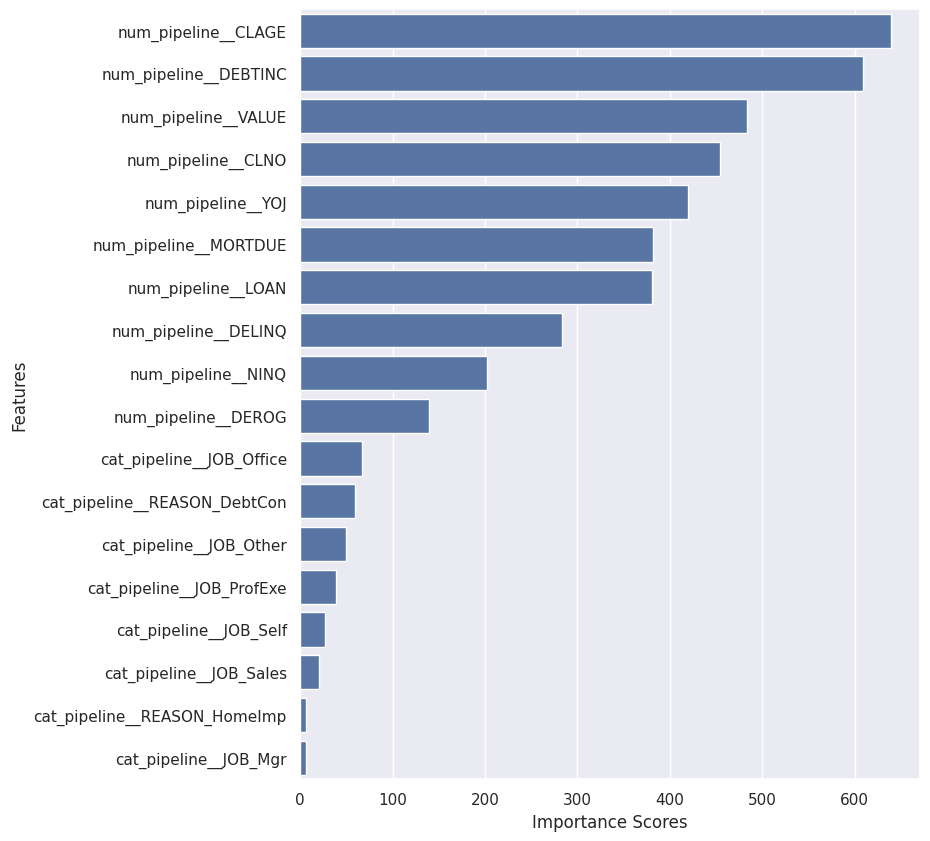

In [ ]:
plot_feature_importances(tuned_lgb2)

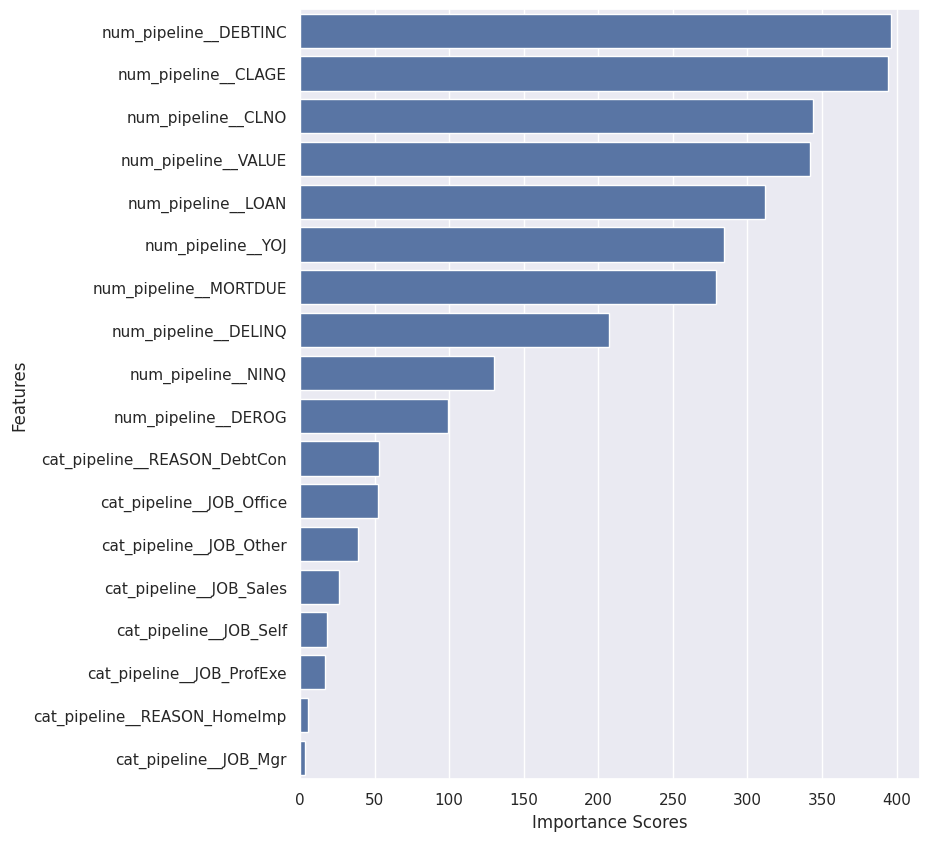

In [ ]:
plot_feature_importances(tuned_lgb)

In [ ]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

results_df.iloc[[0,2,4,6,7,9,11]].style.apply(highlight_max, subset=['Test Recall', 'Test F1-Score'], axis=0)

,Model,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score,Train Time(s),Test Time(s),Model Description
0,Logistic Regression,0.696017,0.688679,0.349106,0.306723,0.464986,0.424419,2.421900,0.081700,Base Model
2,Decision Tree,1.000000,0.693878,1.000000,0.714286,1.000000,0.703934,0.137700,0.041100,Base Model
4,Random Forest Classifier,1.000000,0.851064,1.000000,0.672269,1.000000,0.751174,1.321000,0.126800,Base Model
6,AdaBoost,0.805097,0.796178,0.564669,0.525210,0.663782,0.632911,0.405000,0.079300,Base Model
7,Gradient Boosting,0.877524,0.832432,0.685594,0.647059,0.769776,0.728132,1.503200,0.049800,Base Model
9,XGBoost,0.975385,0.786290,1.000000,0.819328,0.987539,0.802469,0.775100,0.141800,Base Model
11,LightGBM,0.890875,0.745318,0.995794,0.836134,0.940417,0.788119,0.262900,0.091300,Base Model


In [ ]:
results_df.iloc[[1,3,5,8,10,12]].drop(columns='Model Description').style.apply(highlight_max, subset=['Test Recall', 'Test F1-Score'], axis=0)


,Model,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score,Train Time(s),Test Time(s)
1,Logistic Regression - Tuned,0.694561,0.688679,0.349106,0.306723,0.464661,0.424419,14.870000,0.058000
3,Decision Tree - Tuned,1.000000,0.729730,1.000000,0.680672,1.000000,0.704348,16.440000,0.061400
5,Random Forest - Tuned,0.925197,0.802632,0.988433,0.768908,0.955770,0.785408,180.920000,0.119500
8,Gradient Boosting - Regularized,0.962704,0.857868,0.868559,0.710084,0.913212,0.777011,232.170000,0.066200
10,XGBoosting - Tuned,0.896203,0.842932,0.744479,0.676471,0.813326,0.750583,40.210000,0.074000
12,LightGBM - Tuned,0.777219,0.713262,0.975815,0.836134,0.865268,0.769826,91.450000,0.140500


# Executive Summary
- This report presents an analytical approach to predicting loan defaults, aiming to minimize financial losses from defaults while maximizing potential profits from interest accrual. The initial analysis from Milestone identified overfitting issues with Decision Tree-based algorithms, including Random Forest, making them less suitable for accurate predictions. As a result, XGBoost with recall optimization was initially chosen as the most effective model due to its highest Test Recall score of 73%. However, performance analysis revealed a Test Recall of 73% and Train Recall of 99%, indicating a likely overfitting issue that requires further refinement.
- Previously, we tried tuning hyperparameters for Logistic Regression, Decision Tree, and Random Forest, but they did not perform better and still had overfitting issues.
- Therefore, this time we plan to tune hyperparameters for both Gradient Boosting and XGBoost to enhance generalization and improve performance. Additionally, we will explore LightGBM, which uses a leaf-wise tree growth strategy instead of a level-wise approach of traditional boosting algorithms such as Gradient Boosting or XGBoosting. This leaf-wise tree growth strategy allows LightGBM to identify complex patterns more efficiently by focusing on nodes with the highest potential information gain, reducing unnecessary splits and improving computational efficiency.



# Problem and Solution Summary
- Compared to other boosting models, tuned LightGBM is the best performer with a Test Recall of 83%, 83% identifying the true defaults and the top ten most important features of the selected model influencing loan default prediction are: DEBTINC, CLAGE, CLNO, VALUE, LOAN, YOJ, MORTDUE, DELINQ, NINQ, and DEROG. REASON and JOB were found to have minimal impact on the model’s predictions.

- Traditional models tend to overemphasize past credit history (DELINQ, DEROG, CLAGE, NINQ, CLNO), while LightGBM recognizes that current financial standing (property value (VALUE), loan size (LOAN), job stability (YOJ), mortgage due amount (MORTDUE)) is a stronger predictor of default risk. This suggests that recent financial status plays a more significant role in predicting loan defaults than historical credit history alone.
- Unlike deep decision trees that explore all possible feature interactions, LightGBM efficiently selects the most relevant paths, improving recall and computational efficiency. LightGBM outperformed other models, achieving 84% test recall, meaning it successfully detects a high percentage of defaulters.

- Noticeably, the most influential predictor across all models is **DEBTINC** (Debt-to-Income Ratio), which directly reflects an applicant’s ability to repay a loan. A major issue in the dataset is the high percentage (21%) of missing values in DEBTINC. Among defaulters, 60% had missing values in DEBTINC, compared to only 10% in non-defaulters. This missing data imbalance may introduce instability in predictions since imputation using the median might not accurately reflect actual financial situations. Therefore, it is important to make DEBTINC a mandatory field in loan applications to improve data quality and ensure fair decision-making.

**How It Will Impact the Business?**
- The high recall rate effectively identifies defaulters, minimizing the risk of approving high-risk loans. Thus, it helps reduce financial losses.
- There are still some challenges relating to the selected model:
  - LightGBM, being an ensemble learning algorithm, is less interpretable than traditional decision trees. This could pose regulatory challenges regarding decision transparency. However, SHAP (SHapley Additive Explanations) can enhance interpretability, though further exploration is needed.
  - While LightGBM is efficient, its training time can be longer than decision trees or XGBoost. The longer training time can be challenging, especially when handling large datasets or frequent retraining due to evolving financial data in the future.

# Recommendation and Implementation
- The LightGBM model is proposed for its ability to efficiently analyze complex patterns, enabling faster and more accurate loan assessments. Its high recall rate of 83% ensures that the majority of defaulters are correctly identified, reducing financial losses associated with missed defaults. However, one key challenge is its interpretability, which may raise regulatory concerns regarding transparency in loan approvals. To address this, further analysis using SHAP (SHapley Additive Explanations) is recommended to better understand feature importance and explain how predictions are made.

- A significant data issue identified is the high percentage of missing values, which negatively impacts model performance and stability. Implementing a strict data completion requirement will help address this issue, ensuring more accurate and reliable predictions over time. In particular, DEBTINC (Debt-to-Income Ratio) is a key predictor of default risk, making its completeness essential for improving predictive stability and ensuring fairness in loan decisions.

- Currently, the dataset consists of around 5,000 data points and 12 features, which may limit the model’s predictive power and generalization. Expanding the dataset with additional variables could enhance performance. Specifically, **credit score** should be introduced as a key feature, as it is a well-established indicator of an applicant’s ability to repay loans. Additionally, **credit utilization** should be considered, as higher utilization often signals financial strain and increased default risk. It would be also helpful to have an **outstanding debt balance** feature, as it provides a clearer picture of an applicant’s financial burden since it is assumed that individuals with both a high number of credit lines and a significant outstanding debt balance are at higher risk of default.

- Before deployment, consultation with domain experts is essential to validate the legitimacy and relevance of the selected features. This step ensures the model aligns with real-world lending practices and does not introduce unintended biases. Based on expert insights, feature selection will be refined to further improve model accuracy.

- Moreover, ongoing model monitoring and adjustments are crucial as new data continues to flow in. Regular updates will help maintain model stability, detect potential drift, and ensure optimal predictive performance over time.

